<a href="https://colab.research.google.com/github/GesielRodrigues/Curso_PMF/blob/main/PMF_M%C3%B3dulo_02_Manipula%C3%A7%C3%A3o_de_Dados_com_Pandas_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "200">

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/PMF%20002.png?raw=true" width = "700">

# **Módulo 02 - Manipulação de Dados com Python**

O objetivo deste módulo é dar início ao processo de transformação e processamento de dados utilizando a biblioteca Pandas.

Manipular, filtrar, modificar e unir diferentes tipos de dados deixando-os no formato desejado para realizar as análises de mercado financeiro e construção de estratégias.

Este Módulo abrange as seguintes seções:

**1. Noções básicas da obtenção e processamento de dados**

**2. Manipulação de dados**

**3. Consolidação de dataframes**

**4. Finanças quantitativas**

# **2. Manipulação de dados**

Primeiro vamos **baixar os arquivos que utilizaremos diretamente do Google Drive**

In [1]:
# Acessando a pasta no drive e baixando os arquivos que utilizaremos
!gdown https://drive.google.com/drive/folders/1IrYOftAa3dYorE8V3xFtdQ7cz2UHExec?usp=drive_link -O /content --folder

Retrieving folder list
Processing file 1c_JGINOqVFbYFBafKlqS1mMyPkrJt2si Bovespa.csv
Processing file 1bLeV03_81DYPeAo5cp4PEoEM9pQhul_E cotacoes_ibov.csv
Processing file 1ILgc-Tit8MXrPz2J3v-ZR7cLSnrv0HMd cotacoes_pd_series.csv
Processing file 1OU1XEv54N2i9m9H-0DLfSkqJfuMU9HeH PETR4_PROFIT.txt
Processing file 1RVTONm5PqdNGS8lIss-4A9GiGhd7Ko4u PETR4.csv
Processing file 1DKIY2NIBwqmze1A8fLN1jwF0jVLXQfMS PETR4.txt
Processing file 1CChH69Mb0ZissjYaZ3SWehArko2TgJbJ PETR4.xlsx
Processing file 18OC1gWxTZhq-udwZXLdp3JcJG0YKp0mj WIN_MT5.xlsx
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1c_JGINOqVFbYFBafKlqS1mMyPkrJt2si
To: /content/Bovespa.csv
100% 370k/370k [00:00<00:00, 88.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bLeV03_81DYPeAo5cp4PEoEM9pQhul_E
To: /content/cotacoes_ibov.csv
100% 2.17M/2.17M [00:00<00:00, 48.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1I

## 2.0. Importação dos dados

In [2]:
# Importação das bibliotecas

import numpy as np
import pandas as pd

Lendo um arquivo csv com o Pandas

In [3]:
pd.read_csv('cotacoes_pd_series.csv')

,Date;Adj Close
0,04/01/2010;13.81743431
1,05/01/2010;13.6989584
2,06/01/2010;13.88407612
3,07/01/2010;13.75449371
4,08/01/2010;13.68044472
...,...
3212,13/12/2022;23.31999969
3213,14/12/2022;21.46999931
3214,15/12/2022;22.04000092
3215,16/12/2022;22.04999924


Um arquivo .csv em geral tem os valores separados por vírgulas.

Este arquivo em específico está com os valores separados por ponto e vírgula, e por isso a importação não ocorreu da melhor forma.

Nestes casos, precisamos passar alguns parâmetros para a função read_csv() indicando a formatação que o nosso arquivo está.

In [4]:
cotacoes = pd.read_csv('cotacoes_pd_series.csv', sep = ';', index_col = 0)
cotacoes.head()

,Adj Close
Date,
04/01/2010,13.817434
05/01/2010,13.698958
06/01/2010,13.884076
07/01/2010,13.754494
08/01/2010,13.680445


Agora o dataframe foi importado da forma correta.

Ainda assim, o nosso índice, apesar de parecer uma data, está no formato de object (string) o que pode dificultar algumas análises gráficas.

Iremos transforma-lo em um formato de datas do python utilizando a função to_datetime da biblioteca pandas.

In [5]:
# Substituindo o índice atual pela transformação do índice em datetime
cotacoes.index = pd.to_datetime(cotacoes.index)
cotacoes.head()

<ipython-input-5-69e57bb57348>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cotacoes.index = pd.to_datetime(cotacoes.index)


,Adj Close
Date,
2010-04-01,13.817434
2010-05-01,13.698958
2010-06-01,13.884076
2010-07-01,13.754494
2010-08-01,13.680445


## 2.1. Dataframe simples (uma coluna) vs Pandas Series

Observe a estrutura do objeto abaixo. Perceba que ele não possui as delimitações de index e colunas típicas de um Dataframe.

Pois trata-se de outro objeto importante da Pandas: as Series

In [6]:
cotacoes['Adj Close']

Date
2010-04-01    13.817434
2010-05-01    13.698958
2010-06-01    13.884076
2010-07-01    13.754494
2010-08-01    13.680445
                ...    
2022-12-13    23.320000
2022-12-14    21.469999
2022-12-15    22.040001
2022-12-16    22.049999
2022-12-19    22.350000
Name: Adj Close, Length: 3217, dtype: float64

Dataframes podem ser um pouco mais fáceis de visualizar e trabalhar.

Existem algumas formas de transformarmos um pandas Series em pandas Dataframe.

Utilizando uma lista de colunas (mesmo que com uma coluna apenas) mantém o formato df.

In [7]:
cotacoes[['Adj Close']].head()

,Adj Close
Date,
2010-04-01,13.817434
2010-05-01,13.698958
2010-06-01,13.884076
2010-07-01,13.754494
2010-08-01,13.680445


Utilizar o método to_frame()

In [8]:
type(cotacoes['Adj Close'])

pandas.core.series.Series

In [9]:
cotacoes['Adj Close'].to_frame()

,Adj Close
Date,
2010-04-01,13.817434
2010-05-01,13.698958
2010-06-01,13.884076
2010-07-01,13.754494
2010-08-01,13.680445
...,...
2022-12-13,23.320000
2022-12-14,21.469999
2022-12-15,22.040001


## 2.2. Manipulações iniciais

In [10]:
# Carregando o csv PETR4
petr = pd.read_csv('PETR4.csv')
petr.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
1,2000-01-04,5.550,5.550,5.550,5.550,1.768469,28861440000
2,2000-01-05,5.494,5.494,5.494,5.494,1.750625,43033600000
3,2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
4,2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


Perceba que no nosso dataframe a data está como coluna, e não como índice.

Para transformar a coluna de data em índice podemos:

In [11]:
# Substituindo o index pela coluna Date
petr.index = petr.Date
petr.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-03,2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-04,2000-01-04,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-05,2000-01-05,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-06,2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-07,2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


Observe que agora a data se tornou o índice

Podemos remover a coluna "Date" para que não haja redundância

In [12]:
petr.drop(["Date"], axis = 1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


In [13]:
petr.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-03,2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-04,2000-01-04,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-05,2000-01-05,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-06,2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-07,2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


Porém fazendo dessa forma a coluna Date não irá desaparecer do dataframe petr.

Para concretizar a operação temos duas opções:

1. Atribuir a alteração para o próprio dataframet: `petr = petr.drop(["Date"],axis = 1)`
2. Utilizar o parâmetro: `inplace=True`

In [14]:
# petr = petr.drop(["Date"],axis = 1)
petr.drop(["Date", 'Volume'], axis = 1, inplace = True)

In [15]:
petr

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536
...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001


Agora chegaremos ao mesmo objetivo mas de outra forma.

In [16]:
# Carregando novamente o df para o formato original
petr = pd.read_csv('PETR4.csv')
petr.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
1,2000-01-04,5.550,5.550,5.550,5.550,1.768469,28861440000
2,2000-01-05,5.494,5.494,5.494,5.494,1.750625,43033600000
3,2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
4,2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


In [17]:
# Setando a coluna Date como índice
petr = petr.set_index('Date')
petr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-04,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-05,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


Dessa forma, a coluna Date foi transformada em índice e já foi removida das colunas originais tudo com apenas um comando "economizando linhas de código"

Se quisermos criar uma cópia do dataframe com as mesmas informações para manipular os dados sem afetar o original utilizamos o método
`.copy`

In [18]:
copy_petr = petr.copy()
copy_petr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-04,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-05,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


In [19]:
# Utilizando o parâmetro inplace = True para que as alterações sejam concretizadas no próprio dataframe
copy_petr.drop(['Volume'], axis = 1, inplace = True)
copy_petr.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027
2000-01-04,5.550,5.550,5.550,5.550,1.768469
2000-01-05,5.494,5.494,5.494,5.494,1.750625
2000-01-06,5.475,5.475,5.475,5.475,1.744570
2000-01-07,5.500,5.500,5.500,5.500,1.752536


Retiramos a coluna do df copy_petr sem alterar o original petr

O Pandas possui a função `plot()` onde podemos plotar um gráfico do dataframe inteiro

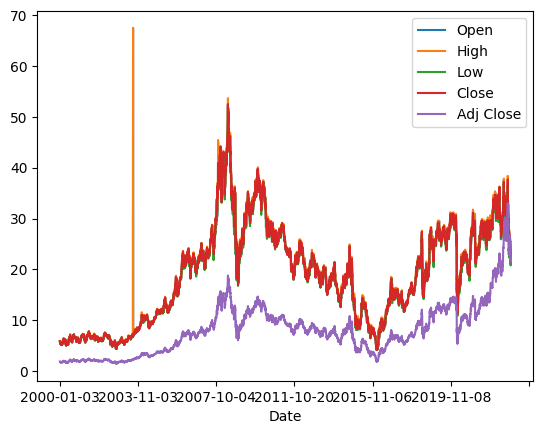

In [20]:
copy_petr.plot();

Podemos escolher quais colunas desejamos plotar

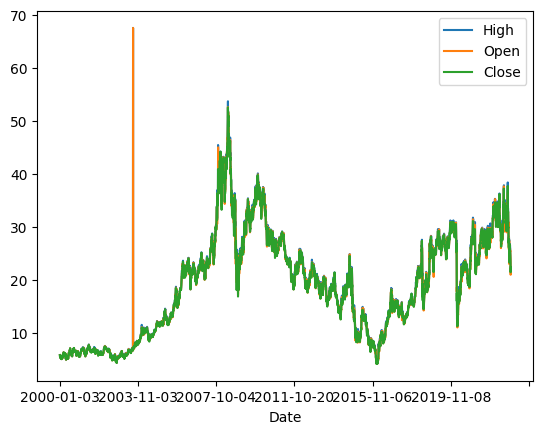

In [21]:
copy_petr[['High', 'Open', 'Close']].plot();

Podemos dar um 'zoom' em datas mais recentes, por exemplo, nos 100 pregões mais recentes e filtrar apenas a coluna Close (agora de uma forma diferente, referenciando a coluna como argumento do dataframe)

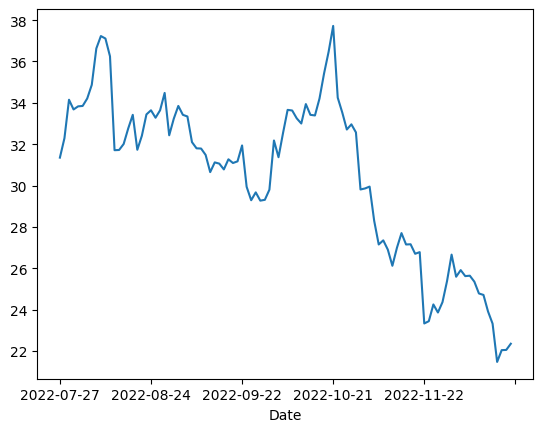

In [22]:
copy_petr.tail(100).Close.plot();

Podemos também utilizar o operador de slicing (igual nas listas)

In [23]:
# Peganso os valores da linha 0 até a 9
copy_petr[0:10]

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027
2000-01-04,5.550,5.550,5.550,5.550,1.768469
2000-01-05,5.494,5.494,5.494,5.494,1.750625
2000-01-06,5.475,5.475,5.475,5.475,1.744570
2000-01-07,5.500,5.500,5.500,5.500,1.752536
2000-01-10,5.613,5.613,5.613,5.613,1.788543
2000-01-11,5.475,5.475,5.475,5.475,1.744570
2000-01-12,5.483,5.483,5.483,5.483,1.747119
2000-01-13,5.325,5.325,5.325,5.325,1.696774


In [24]:
# Pegando do começo até a penúltima posição
copy_petr[:-1]

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536
...,...,...,...,...,...
2022-12-12,24.580000,24.660000,23.129999,23.910000,23.910000
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999


In [25]:
# Pegando as 3 últimas linhas
copy_petr[-3:]

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001
2022-12-16,21.959999,22.110001,21.510000,22.049999,22.049999
2022-12-19,22.100000,22.469999,21.639999,22.350000,22.350000


## 2.3. Acessando células específicas do dataframe: filtros simples e shift

Imagine que precisamos selecionar algumas datas específicas. Como você poderiamos fazer?

Utilizando os métodos `.loc` e `.iloc.`

In [26]:
copy_petr.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027
2000-01-04,5.550,5.550,5.550,5.550,1.768469
2000-01-05,5.494,5.494,5.494,5.494,1.750625
2000-01-06,5.475,5.475,5.475,5.475,1.744570
2000-01-07,5.500,5.500,5.500,5.500,1.752536


### 2.3.1. O método .loc

O .loc é utilizado para filtrar utilizando a métrica do índice do dataframe.

Por exemplo, a métrica do índice do nosso dataframe como índice é a **data**.

Nesse caso devemos usar o .loc com a(s) data(s) para realizar o(s) filtro(s).


In [27]:
# Filtrando uma data em específico
copy_petr.loc['2021-05-26']

Open         25.910000
High         26.180000
Low          25.650000
Close        26.090000
Adj Close    12.809803
Name: 2021-05-26, dtype: float64

O retorno foi um pd.Series, podemos transformar em DataFrame utilizando a função do pandas:

In [28]:
pd.DataFrame(copy_petr.loc['2021-05-26'])

,2021-05-26
Open,25.910000
High,26.180000
Low,25.650000
Close,26.090000
Adj Close,12.809803


In [29]:
# Guardando o resultado do filtro em uma variável
petr_filtrada = copy_petr.loc['2021-05-26']

In [30]:
petr_filtrada

Open         25.910000
High         26.180000
Low          25.650000
Close        26.090000
Adj Close    12.809803
Name: 2021-05-26, dtype: float64

Filtrando os dados ENTRE duas datas

In [31]:
petr_filtrada = copy_petr.loc['2020-01-01':'2021-05-26']

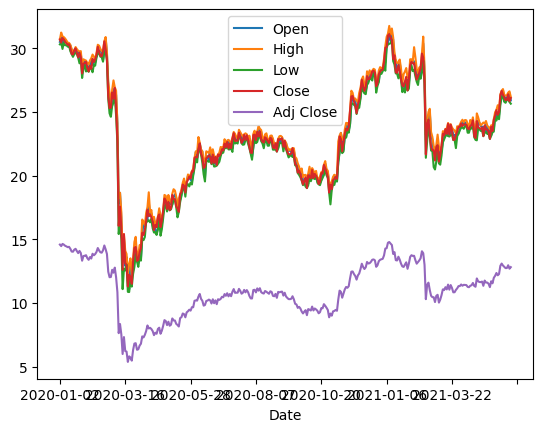

In [32]:
petr_filtrada.plot();

O .loc permite filtrar também as colunas desejadas:

In [33]:
# Pegando apenas a coluna Close, passando o nome da coluna como segundo argumento da função .loc
petr_filtrada = copy_petr.loc['2020-01-01':'2021-05-26', 'Close']

# Como foi apenas uma coluna, por padrão, o retorno é uma pd.Series
petr_filtrada

Date
2020-01-02    30.700001
2020-01-03    30.450001
2020-01-06    30.809999
2020-01-07    30.690001
2020-01-08    30.500000
                ...    
2021-05-20    25.930000
2021-05-21    25.950001
2021-05-24    26.389999
2021-05-25    25.840000
2021-05-26    26.090000
Name: Close, Length: 346, dtype: float64

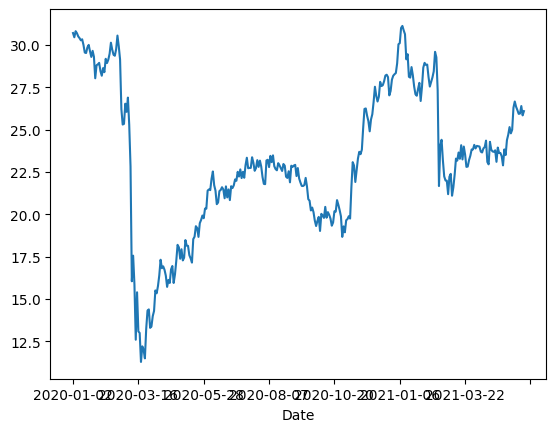

In [34]:
petr_filtrada.plot();

In [35]:
# Pegando duas colunas, passando uma lista com o nome das colunas como segundo argumento
petr_filtrada = copy_petr.loc['2021-02-01':'2021-05-26', ['Open','Close']]
petr_filtrada.head()

,Open,Close
Date,,
2021-02-01,27.26,27.530001
2021-02-02,28.40,28.660000
2021-02-03,28.98,28.940001
2021-02-04,28.83,28.820000
2021-02-05,28.98,28.840000


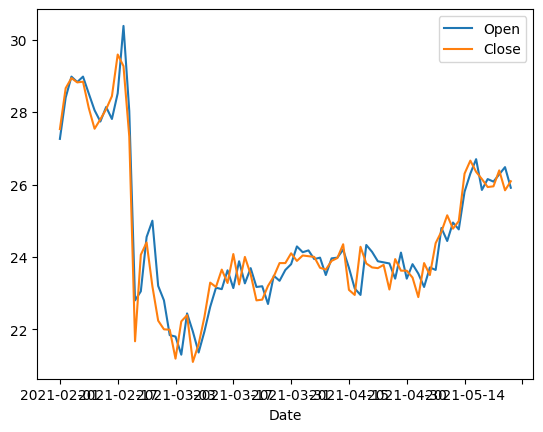

In [36]:
petr_filtrada.plot();

Filtrando a partir de uma data específica e indo até a última data disponível

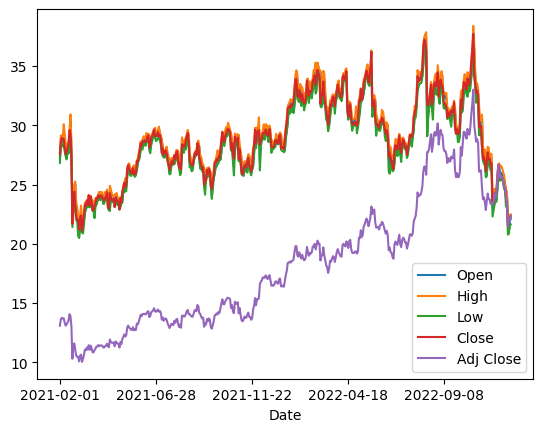

In [37]:
petr_filtrada = copy_petr.loc['2021-02-01':]
petr_filtrada.plot();

Obtendo os dados desde o início e indo até uma data limite específica

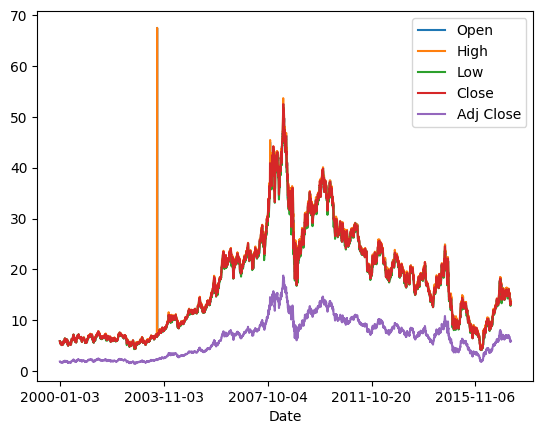

In [38]:
petr_filtrada = copy_petr.loc[:'2017-03-26']
petr_filtrada.plot();

### 2.3.2. O método .iloc

O .iloc é utilizado quando o filtro deve ser feito com a **posição da linha**  do dataframe.

Por exemplo, precisamos da linha X, ou precisamos pegar da linha 200 até a 500.

In [39]:
# Obtendo a linha 0 (primeira linha, excluindo o cabeçalho)
copy_petr.iloc[0]

Open         5.875000
High         5.875000
Low          5.875000
Close        5.875000
Adj Close    1.872027
Name: 2000-01-03, dtype: float64

In [40]:
# Obtendo a linha 1
copy_petr.iloc[1]

Open         5.550000
High         5.550000
Low          5.550000
Close        5.550000
Adj Close    1.768469
Name: 2000-01-04, dtype: float64

In [41]:
# Obtendo a última linha
copy_petr.iloc[-1]

Open         22.100000
High         22.469999
Low          21.639999
Close        22.350000
Adj Close    22.350000
Name: 2022-12-19, dtype: float64

In [42]:
# Obtendo da linha 20 até a linha 199 (200 não inclusiva)
petr_filtrada = copy_petr.iloc[20:200]
petr_filtrada

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-31,5.10100,5.10100,5.10100,5.10100,1.625398
2000-02-01,5.20000,5.20000,5.20000,5.20000,1.656944
2000-02-02,5.30000,5.30000,5.30000,5.30000,1.688808
2000-02-03,5.45000,5.45000,5.45000,5.45000,1.736604
2000-02-04,5.58800,5.58800,5.58800,5.58800,1.780577
...,...,...,...,...,...
2000-10-02,6.52500,6.52500,6.52500,6.52500,2.079145
2000-10-03,6.55125,6.55125,6.55125,6.55125,2.087510
2000-10-04,6.62500,6.62500,6.62500,6.62500,2.111010


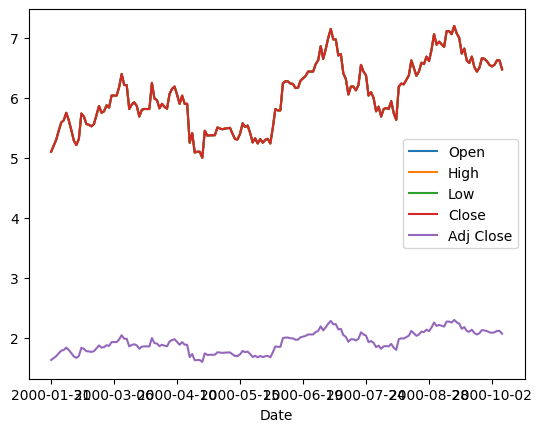

In [43]:
petr_filtrada.plot();

Obtendo todas as linhas até a linha 100 (linha 100 não inclusiva)

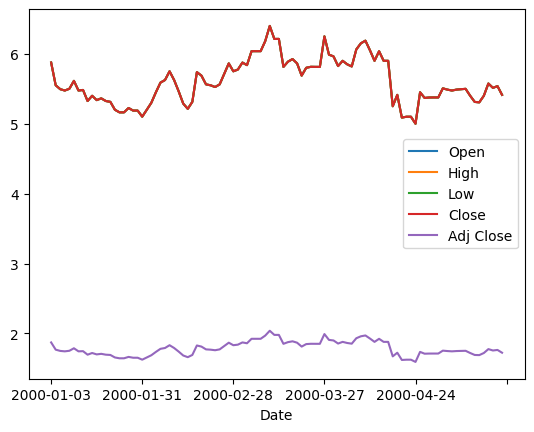

In [44]:
petr_filtrada = copy_petr.iloc[:100]
petr_filtrada.plot();

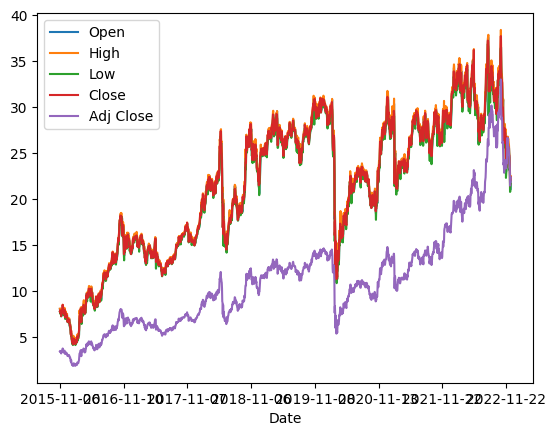

In [45]:
# Filtrando a partir da linha 4.000 até o final
petr_filtrada = copy_petr.iloc[4000:]
petr_filtrada.plot();

Assim como o `.loc`, podemos filtrar as colunas passando o índice (ou uma lista) da coluna como segundo argumento

In [46]:
# Apenas as colunas 0 (Open), 3 (Close) e a 4 (Adj Close)
copy_petr.iloc[0:5, [0,3,4]]

,Open,Close,Adj Close
Date,,,
2000-01-03,5.875,5.875,1.872027
2000-01-04,5.550,5.550,1.768469
2000-01-05,5.494,5.494,1.750625
2000-01-06,5.475,5.475,1.744570
2000-01-07,5.500,5.500,1.752536


In [47]:
# Filtrando as colunas como um range (da coluna 2 a 3, 4 não inclusiva)
copy_petr.iloc[0:5, 2:4]

,Low,Close
Date,,
2000-01-03,5.875,5.875
2000-01-04,5.550,5.550
2000-01-05,5.494,5.494
2000-01-06,5.475,5.475
2000-01-07,5.500,5.500


Filtrando todas as linhas, e pegando apenas duas colunas.

É possível filtrar as colunas pelo nome, assim como no `.iloc`.

In [48]:
copy_petr.loc[:,['Open','Close']]

,Open,Close
Date,,
2000-01-03,5.875000,5.875000
2000-01-04,5.550000,5.550000
2000-01-05,5.494000,5.494000
2000-01-06,5.475000,5.475000
2000-01-07,5.500000,5.500000
...,...,...
2022-12-13,24.100000,23.320000
2022-12-14,22.500000,21.469999
2022-12-15,21.000000,22.040001


Assim como nas listas, podemos indicar *passo (step)* que indica como iremos percorrer o dataframe.

Exemplo, vamos pegar o dataframe inteiro passando de 2 em 2 linhas.

In [49]:
copy_petr.loc[::2,['Open','Close']]

,Open,Close
Date,,
2000-01-03,5.875000,5.875000
2000-01-05,5.494000,5.494000
2000-01-07,5.500000,5.500000
2000-01-11,5.475000,5.475000
2000-01-13,5.325000,5.325000
...,...,...
2022-12-06,25.820000,25.639999
2022-12-08,25.549999,24.780001
2022-12-12,24.580000,23.910000


Invertendo os dados de trás pra frente

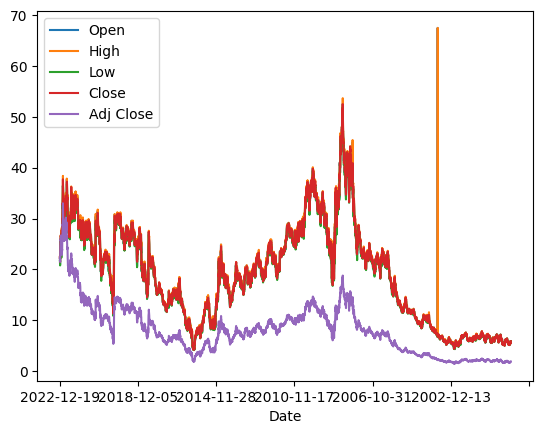

In [50]:
petr_invertida = copy_petr.iloc[::-1]

petr_invertida.plot();

### 2.3.3. O método .shift

Permite acessar linhas anteriores, extramamente útil em dados de séries temporais.

Exemplo: criar uma coluna com o fechamento do dia anterior.

In [51]:
copy_petr.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027
2000-01-04,5.550,5.550,5.550,5.550,1.768469
2000-01-05,5.494,5.494,5.494,5.494,1.750625
2000-01-06,5.475,5.475,5.475,5.475,1.744570
2000-01-07,5.500,5.500,5.500,5.500,1.752536


In [52]:
# Exemplo, jogando o valor do fechamento 2 casas a frente
copy_petr[['Close']].shift(2).head()

,Close
Date,
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,5.875
2000-01-06,5.550
2000-01-07,5.494


In [53]:
# Criando uma coluna com o valor de fechamento do dia anterior
copy_petr['Close_anterior'] = copy_petr['Close'].shift(1)
copy_petr.head()

,Open,High,Low,Close,Adj Close,Close_anterior
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027,NaN
2000-01-04,5.550,5.550,5.550,5.550,1.768469,5.875
2000-01-05,5.494,5.494,5.494,5.494,1.750625,5.550
2000-01-06,5.475,5.475,5.475,5.475,1.744570,5.494
2000-01-07,5.500,5.500,5.500,5.500,1.752536,5.475


In [54]:
 # Criando uma coluna com o valor do valor máximo (high) do dia seguinte utilizando o -1
copy_petr['Max_proximo_dia'] = copy_petr['High'].shift(-1)
copy_petr.tail()

,Open,High,Low,Close,Adj Close,Close_anterior,Max_proximo_dia
Date,,,,,,,
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,23.910000,22.600000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,23.320000,22.370001
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,21.469999,22.110001
2022-12-16,21.959999,22.110001,21.510000,22.049999,22.049999,22.040001,22.469999
2022-12-19,22.100000,22.469999,21.639999,22.350000,22.350000,22.049999,NaN


## 2.4. Índices: explorando as séries temporais com index datetime

In [55]:
# DF petr original
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


In [56]:
# Analisando os tipos das colunas
petr.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [57]:
# Analisando o índice

Observe que mesmo parecendo que o index é do tipo datetime, o dtype nos mostra: `dtype=object` o que significa que ele não está configurado como data (datetime).

In [58]:
# Convertendo o índice em datetime
petr.index = pd.to_datetime(petr.index)

# Agora sim
petr.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09',
               '2022-12-12', '2022-12-13', '2022-12-14', '2022-12-15',
               '2022-12-16', '2022-12-19'],
              dtype='datetime64[ns]', name='Date', length=5770, freq=None)

Se nenhum timezone está delimitado ainda, podemos definir utilizando o `tz_localize`

In [59]:
# Definindo o timezone como UTC
petr.index = petr.index.tz_localize('UTC')
petr.index

DatetimeIndex(['2000-01-03 00:00:00+00:00', '2000-01-04 00:00:00+00:00',
               '2000-01-05 00:00:00+00:00', '2000-01-06 00:00:00+00:00',
               '2000-01-07 00:00:00+00:00', '2000-01-10 00:00:00+00:00',
               '2000-01-11 00:00:00+00:00', '2000-01-12 00:00:00+00:00',
               '2000-01-13 00:00:00+00:00', '2000-01-14 00:00:00+00:00',
               ...
               '2022-12-06 00:00:00+00:00', '2022-12-07 00:00:00+00:00',
               '2022-12-08 00:00:00+00:00', '2022-12-09 00:00:00+00:00',
               '2022-12-12 00:00:00+00:00', '2022-12-13 00:00:00+00:00',
               '2022-12-14 00:00:00+00:00', '2022-12-15 00:00:00+00:00',
               '2022-12-16 00:00:00+00:00', '2022-12-19 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=5770, freq=None)

In [60]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03 00:00:00+00:00,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-04 00:00:00+00:00,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-05 00:00:00+00:00,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-06 00:00:00+00:00,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-07 00:00:00+00:00,5.500,5.500,5.500,5.500,1.752536,20912640000


Quando já existe um timezone, podemos alterar utilizando o `tz_convert`

In [61]:
petr.index = petr.index.tz_convert('America/Sao_Paulo')
petr.index

DatetimeIndex(['2000-01-02 22:00:00-02:00', '2000-01-03 22:00:00-02:00',
               '2000-01-04 22:00:00-02:00', '2000-01-05 22:00:00-02:00',
               '2000-01-06 22:00:00-02:00', '2000-01-09 22:00:00-02:00',
               '2000-01-10 22:00:00-02:00', '2000-01-11 22:00:00-02:00',
               '2000-01-12 22:00:00-02:00', '2000-01-13 22:00:00-02:00',
               ...
               '2022-12-05 21:00:00-03:00', '2022-12-06 21:00:00-03:00',
               '2022-12-07 21:00:00-03:00', '2022-12-08 21:00:00-03:00',
               '2022-12-11 21:00:00-03:00', '2022-12-12 21:00:00-03:00',
               '2022-12-13 21:00:00-03:00', '2022-12-14 21:00:00-03:00',
               '2022-12-15 21:00:00-03:00', '2022-12-18 21:00:00-03:00'],
              dtype='datetime64[ns, America/Sao_Paulo]', name='Date', length=5770, freq=None)

In [62]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500,1.752536,20912640000


#### Formatação da data

Para acessar os dados do índice com formatos de data/hora específico.

In [63]:
# Por exemplo, apenas o ano
petr.index.year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='Date', length=5770)

In [64]:
# Apenas o mês
petr.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=5770)

In [65]:
# Apenas o dia
petr.index.day

Int64Index([ 2,  3,  4,  5,  6,  9, 10, 11, 12, 13,
            ...
             5,  6,  7,  8, 11, 12, 13, 14, 15, 18],
           dtype='int64', name='Date', length=5770)

In [66]:
# A data completa
petr.index.date

array([datetime.date(2000, 1, 2), datetime.date(2000, 1, 3),
       datetime.date(2000, 1, 4), ..., datetime.date(2022, 12, 14),
       datetime.date(2022, 12, 15), datetime.date(2022, 12, 18)],
      dtype=object)

In [67]:
# Apenas a hora
petr.index.time

array([datetime.time(22, 0), datetime.time(22, 0), datetime.time(22, 0),
       ..., datetime.time(21, 0), datetime.time(21, 0),
       datetime.time(21, 0)], dtype=object)

In [68]:
# O mês literal
petr.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December'],
      dtype='object', name='Date', length=5770)

In [69]:
# O dia literal
petr.index.day_name()

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       ...
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Sunday'],
      dtype='object', name='Date', length=5770)

#### Biblioteca datetime

Utilizando a biblioteca datetime, a manipulação de data/hora fica mais versátil

In [70]:
from datetime import datetime, timedelta

In [71]:
data_atual = '04-01-2022'

In [72]:
type(data_atual)

str

Para convertermos uma string para um objeto datetime (ou vice e versa), devemos passar o seu *`format code`*

Abaixo uma lista dos *`format codes`* básicos

| format code | Significado                         | Exemplo                              |
|---------|------------------------------------|---------------------------------------|
| %a      | Dia da semana como nome abreviado. | Sun, Mon, …  |
| %A      | Dia da semana como nome completo. | Sunday, Monday, …|
| %w      | Dia da semana como numero decimal (0 Domingo e 6 Sábado). | 0, 1, …, 6 |
| %d      | Dia do mês como número decimal. | 01, 02, …, 31 |
| %b      | Mês como nome abreviado. | Jan, Feb, …, Dec |
| %B      | Mês como nome completo. | January, February, …, December |
| %m      | Mês como número decimal. | 01, 02, …, 12 |
| %y      | Ano sem o século como número decimal. | 00, 01, …, 99 |
| %Y      | Ano com o século como número decimal. | 0001, 0002, …, 2013, 2014, …, 9998, 9999 |
| %H      | Hora (relógio de 24 horas) como número decimal. | 00, 01, …, 23 |
| %I      | Hora (relógio de 12 horas) como número decimal. | 01, 02, …, 12 |
| %p      | Equivalente da localidade para AM ou PM. | AM, PM (en_US) |
| %M      | Minuto como número decimal. | 00, 01, …, 59 |
| %S      | Segundos como número decimal. | 00, 01, …, 59 |
| %Z      | Nome do fuso horário (string vazia se o objeto for ingênuo). | (vazio), UTC, GMT |
| %j      | Dia do ano como número decimal. | 001, 002, …, 366 |
| %c      | Representação de data e hora apropriada da localidade. | Tue Aug 16 21:30:00 1988 (en_US) |
| %x      | Representação de data apropriada da localidade. | 08/16/88 (None); 08/16/1988 (en_US) |
| %X      | Representação de hora apropriada da localidade. | 21:30:00 (en_US); 21:30:00 (de_DE) |

In [73]:
datetime.strptime(data_atual, "%d-%m-%Y")

datetime.datetime(2022, 1, 4, 0, 0)

Obtendo data e hora do momento atual

In [74]:
datetime.now()

datetime.datetime(2023, 11, 3, 14, 41, 37, 418419)

In [75]:
data_hora_atual = datetime.now()

# Dia da semana da data atual
print(datetime.strftime(data_hora_atual, "%A"))
# Mês literal
print(datetime.strftime(data_hora_atual, "%B"))
# Mês como decimal
print(datetime.strftime(data_hora_atual, "%m"))
# Data abreviada
print(datetime.strftime(data_hora_atual, "%D"))

Friday
November
11
11/03/23


#### Usando o timedelta

**timedelta** nos ajuda a realizar operações matemáticas envolvendo datas e horas, como somar ou subtrair um certo número de dias, horas e etc., a partir de uma data existente.

In [76]:
# Pegando uma data de 200 dias atrás a partir da data de hoje
data_200_dias_atras = datetime.now() -  timedelta(days = 200)
data_200_dias_atras

datetime.datetime(2023, 4, 17, 14, 41, 37, 440079)

In [77]:
# Formatando a saída da data de 200 dias atrás
datetime.strftime(data_200_dias_atras, "%D")

'04/17/23'

#### Função `date_range` do Pandas

In [78]:
# Pegando uma data e transformando em datetime com o uso do pandas
data_atual = '31-10-2023'
data_atual = pd.to_datetime(data_atual, format = "%d-%m-%Y")
data_atual

Timestamp('2023-10-31 00:00:00')

A função date_range é uma função que permite criar um intervalo de datas com base em uma variedade de parâmetros.

Podemos criar uma lista de datas especificando o timeframe que queremos no parâmetro freq.

In [79]:
# 'T' = minutos.
pd.date_range('10/31/2023', periods = 5, freq = 'T')

DatetimeIndex(['2023-10-31 00:00:00', '2023-10-31 00:01:00',
               '2023-10-31 00:02:00', '2023-10-31 00:03:00',
               '2023-10-31 00:04:00'],
              dtype='datetime64[ns]', freq='T')

In [80]:
# 5 minutos.
pd.date_range('04/01/2023', periods = 10, freq = '5T')

DatetimeIndex(['2023-04-01 00:00:00', '2023-04-01 00:05:00',
               '2023-04-01 00:10:00', '2023-04-01 00:15:00',
               '2023-04-01 00:20:00', '2023-04-01 00:25:00',
               '2023-04-01 00:30:00', '2023-04-01 00:35:00',
               '2023-04-01 00:40:00', '2023-04-01 00:45:00'],
              dtype='datetime64[ns]', freq='5T')

Tabela com algumas frequências possíveis:

| Frequência | Descrição                        |
|------------|----------------------------------|
| 'D'        | Diario                      |
| 'B'        | Dias úteis (de segunda a sexta)   |
| 'H'        | Hora                     |
| 'T' ou 'min' | Minutos                   |
| 'S'        | Segundos                     |
| 'W'        | Semanal (início da semana)  |
| 'M'        | Mensal (último dia do mês)  |
| 'Q'        | Trimestral (último dia do trimestre) |
| 'A'        | Anual (último dia do ano)   |


#### Método resample

O método resample permite agrupar timeframes menores para criar um conjunto de dados agrupado.

Por exemplo, vamos converter os dados diários em dados mensais

In [81]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500,1.752536,20912640000


Observar que devemos dizer como queremos agrupar os dados utilizando a função agg (aggregate)

In [82]:
petr_month = petr.resample('1M').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close': 'last','Volume':'sum' })
petr_month.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-31 00:00:00-02:00,5.875,5.875,5.101,5.200,545825280000
2000-02-29 00:00:00-03:00,5.300,5.875,5.213,5.875,525306880000
2000-03-31 00:00:00-03:00,5.838,6.399,5.688,5.900,384163840000
2000-04-30 00:00:00-03:00,5.850,6.188,5.000,5.376,582123520000
2000-05-31 00:00:00-03:00,5.506,5.575,5.238,5.500,550553600000


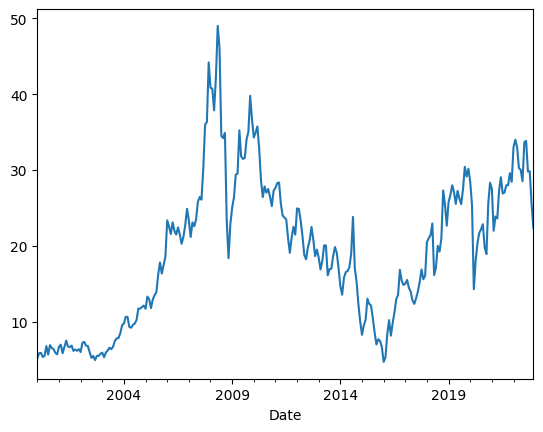

In [83]:
petr_month.Close.plot();

## 2.5. Colunas: filtrar, renomear e reordenar

In [84]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500,1.752536,20912640000


In [85]:
# Listando as colunas do nosso dataframe
petr.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [86]:
# Transformando em uma list
list(petr.columns)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

Selecionando apenas as colunas OHLC do dataframe

In [87]:
petr_filtrada = petr[['Open', 'High', 'Low', 'Close']]
petr_filtrada.head()

,Open,High,Low,Close
Date,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500


Também é possível selecionar as colunas fazendo slicing de seus índices

In [88]:
petr_filtrada.iloc[:, 0:3]

,Open,High,Low
Date,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000
...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000


#### Renomeando colunas

Existem duas formas de renomear as colunas

In [89]:
# Podemos atribuir a lista de columns uma nova lista com os nomes que desejamos renomear
# Esta lista deve conter o mesmo tamanho, e será renomeado na mesma ordem
petr_filtrada.columns = ['Abertura', 'Máxima', 'Mínima', 'Fechamento']
petr_filtrada.head()

,Abertura,Máxima,Mínima,Fechamento
Date,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500


In [90]:
# Outra forma é utilizando um dicionário para renomear as colunas
# O dicionário deve conter a estrutura {'nome antigo' : 'novo nome'}
columns_dict = {'Abertura' : 'Open', 'Máxima' : 'High', 'Mínima' : 'Low', 'Fechamento' : 'Close'}

# Passamos o dicionário no método rename e indicamos o axis=1 (colunas)
petr_filtrada = petr_filtrada.rename(columns_dict, axis = 1)
petr_filtrada.head()

,Open,High,Low,Close
Date,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500


#### Reordenar as colunas

In [91]:
list(petr_filtrada.columns)

['Open', 'High', 'Low', 'Close']

In [92]:
# Podemos reordenar as colunas, utilizando uma lista com o nome das colunas na ordem desejada
# Os nomes devem ser iguais aos nomes das colunas
petr_filtrada[['Open', 'Close', 'Low', 'High']]

,Open,Close,Low,High
Date,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000
...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,23.320000,23.309999,24.200001
2022-12-13 21:00:00-03:00,22.500000,21.469999,20.770000,22.600000
2022-12-14 21:00:00-03:00,21.000000,22.040001,20.830000,22.370001


#### Adicionando novas colunas em posições específicas

Podemos inserir uma nova coluna não necessariamente como a última (padrão), mas especificando qual a posição, o nome e os dados com o método `.insert`

In [93]:
# Inserindo a coluna Ativo no início da tabela (índice=0), com os valores PETR4
petr_filtrada.insert(0, 'Ativo', 'PETR4')
petr_filtrada.head()

,Ativo,Open,High,Low,Close
Date,,,,,
2000-01-02 22:00:00-02:00,PETR4,5.875,5.875,5.875,5.875
2000-01-03 22:00:00-02:00,PETR4,5.550,5.550,5.550,5.550
2000-01-04 22:00:00-02:00,PETR4,5.494,5.494,5.494,5.494
2000-01-05 22:00:00-02:00,PETR4,5.475,5.475,5.475,5.475
2000-01-06 22:00:00-02:00,PETR4,5.500,5.500,5.500,5.500


Outra forma menos usual mas que pode ser útil para criar novas colunas é através do método `.assign`

In [94]:
# Incluindo uma coluna chamada Resultado que é o resultado da operação Fechamento - Abertura
petr_filtrada.assign(Resultado = (petr_filtrada['Close'] - petr_filtrada['Open']))

,Ativo,Open,High,Low,Close,Resultado
Date,,,,,,
2000-01-02 22:00:00-02:00,PETR4,5.875000,5.875000,5.875000,5.875000,0.000000
2000-01-03 22:00:00-02:00,PETR4,5.550000,5.550000,5.550000,5.550000,0.000000
2000-01-04 22:00:00-02:00,PETR4,5.494000,5.494000,5.494000,5.494000,0.000000
2000-01-05 22:00:00-02:00,PETR4,5.475000,5.475000,5.475000,5.475000,0.000000
2000-01-06 22:00:00-02:00,PETR4,5.500000,5.500000,5.500000,5.500000,0.000000
...,...,...,...,...,...,...
2022-12-12 21:00:00-03:00,PETR4,24.100000,24.200001,23.309999,23.320000,-0.780001
2022-12-13 21:00:00-03:00,PETR4,22.500000,22.600000,20.770000,21.469999,-1.030001
2022-12-14 21:00:00-03:00,PETR4,21.000000,22.370001,20.830000,22.040001,1.040001


## 2.6. Dataframes mais complexos, incluindo multi-index

#### Lista dos ativos do IBOV

Para demonstrar manipulações de dados em um dataframe de várias colunas, vamos extrair os dados das ações que compõem o IBOV

Para saber a composição atualizada do IBOV acesse o link:

https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

Nesta seção, vamos utilizar algumas bibliotecas de dados de mercado financeiro, como a yfinance, que extrai dados do Yahoo Finance

Os ativos que compõem o IBOV que iremos utilizar são:

["RADL3", "BRML3", "QUAL3", "ELET3", "BBDC3", "CCRO3", "BBSE3", "JBSS3", "ENBR3", "MRVE3", "ASAI3", "CRFB3", "TOTS3", "GGBR4", "TIMS3", "IRBR3", "USIM5", "BRFS3", "BBDC4", "BRAP4", "ABEV3", "UGPA3", "PETR3", "VBBR3", "BPAC11", "ITSA4", "BPAN4", "CSAN3", "DXCO3", "TAEE11", "PCAR3", "CIEL3", "RENT3", "PRIO3", "EGIE3", "HAPV3", "LWSA3", "LREN3", "FLRY3", "CPLE6", "RRRP3", "ALPA4", "CASH3", "COGN3", "ENGI11", "VALE3", "PETZ3", "SUZB3", "EMBR3", "MRFG3", "KLBN11", "AZUL4", "CMIN3", "AMER3", "ELET6", "BRKM5", "BEEF3", "CSNA3", "MGLU3", "SLCE3", "PETR4", "POSI3", "GOLL4", "SBSP3", "CYRE3", "EQTL3", "RDOR3", "GOAU4", "WEGE3", "ECOR3", "ARZZ3", "NTCO3", "CPFE3", "IGTI11", "EZTC3", "B3SA3", "CMIG4", "RAIL3", "RAIZ4", "HYPE3", "ITUB4", "ENEV3", "BBAS3", "VIIA3", "CVCB3", "SOMA3", "VIVT3", "MULT3", "SMTO3", "YDUQ3", "SANB11"]

In [95]:
# Lista com os ativos utilizados
tickers_IBOV = ["RADL3", "BRML3", "QUAL3", "ELET3", "BBDC3", "CCRO3", "BBSE3", "JBSS3", "ENBR3", "MRVE3", "ASAI3", "CRFB3", "TOTS3", "GGBR4", "TIMS3", "IRBR3", "USIM5", "BRFS3", "BBDC4", "BRAP4", "ABEV3", "UGPA3", "PETR3", "VBBR3", "BPAC11", "ITSA4", "BPAN4", "CSAN3", "DXCO3", "TAEE11", "PCAR3", "CIEL3", "RENT3", "PRIO3", "EGIE3", "HAPV3", "LWSA3", "LREN3", "FLRY3", "CPLE6", "RRRP3", "ALPA4", "CASH3", "COGN3", "ENGI11", "VALE3", "PETZ3", "SUZB3", "EMBR3", "MRFG3", "KLBN11", "AZUL4", "CMIN3", "AMER3", "ELET6", "BRKM5", "BEEF3", "CSNA3", "MGLU3", "SLCE3", "PETR4", "POSI3", "GOLL4", "SBSP3", "CYRE3", "EQTL3", "RDOR3", "GOAU4", "WEGE3", "ECOR3", "ARZZ3", "NTCO3", "CPFE3", "IGTI11", "EZTC3", "B3SA3", "CMIG4", "RAIL3", "RAIZ4", "HYPE3", "ITUB4", "ENEV3", "BBAS3", "VIIA3", "CVCB3", "SOMA3", "VIVT3", "MULT3", "SMTO3", "YDUQ3", "SANB11"]

In [96]:
# Ordenando a lista
tickers_IBOV.sort()

In [97]:
tickers_IBOV

['ABEV3',
 'ALPA4',
 'AMER3',
 'ARZZ3',
 'ASAI3',
 'AZUL4',
 'B3SA3',
 'BBAS3',
 'BBDC3',
 'BBDC4',
 'BBSE3',
 'BEEF3',
 'BPAC11',
 'BPAN4',
 'BRAP4',
 'BRFS3',
 'BRKM5',
 'BRML3',
 'CASH3',
 'CCRO3',
 'CIEL3',
 'CMIG4',
 'CMIN3',
 'COGN3',
 'CPFE3',
 'CPLE6',
 'CRFB3',
 'CSAN3',
 'CSNA3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'ECOR3',
 'EGIE3',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENBR3',
 'ENEV3',
 'ENGI11',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'GGBR4',
 'GOAU4',
 'GOLL4',
 'HAPV3',
 'HYPE3',
 'IGTI11',
 'IRBR3',
 'ITSA4',
 'ITUB4',
 'JBSS3',
 'KLBN11',
 'LREN3',
 'LWSA3',
 'MGLU3',
 'MRFG3',
 'MRVE3',
 'MULT3',
 'NTCO3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PETZ3',
 'POSI3',
 'PRIO3',
 'QUAL3',
 'RADL3',
 'RAIL3',
 'RAIZ4',
 'RDOR3',
 'RENT3',
 'RRRP3',
 'SANB11',
 'SBSP3',
 'SLCE3',
 'SMTO3',
 'SOMA3',
 'SUZB3',
 'TAEE11',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VALE3',
 'VBBR3',
 'VIIA3',
 'VIVT3',
 'WEGE3',
 'YDUQ3']

PONTO IMPORTANTE

As ações brasileiras no Yahoo Finance terminam com ".SA". Isso é válido inclusive para outros papéis, como ETFs, FIIs, BDRs

Vamos acrescentar ".SA" ao fim do nome dos papeis

In [98]:
# Utilizando list comprehension
tickers_IBOV_SA = [i + '.SA' for i in tickers_IBOV]
tickers_IBOV_SA

['ABEV3.SA',
 'ALPA4.SA',
 'AMER3.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BPAC11.SA',
 'BPAN4.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SLCE3

**DISCLAIMER**

Caso a yfinance apresente problemas, existe o .csv com os dados.

In [99]:
# instalando o yfinance
!pip install yfinance

In [100]:
# Importando o yfinance
import yfinance as yf

In [101]:
# Testando baixando os dados da VALE3
yf.download('VALE3.SA', start = '2021-01-01', end = '2021-12-31', period = "1d")

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,89.349998,91.480003,88.849998,91.459999,67.380257,37865500
2021-01-05,91.459999,93.000000,90.519997,93.000000,68.514809,34300300
2021-01-06,94.980003,96.349998,94.400002,96.050003,70.761803,53722500
2021-01-07,96.610001,102.529999,96.610001,102.320000,75.381027,74541400
2021-01-08,103.010002,103.349998,98.199997,102.000000,75.145279,58562700
...,...,...,...,...,...,...
2021-12-23,79.949997,80.059998,78.800003,79.150002,68.596680,13121200
2021-12-27,78.870003,79.449997,78.260002,78.949997,68.423347,11371400
2021-12-28,78.510002,78.529999,76.570000,77.050003,66.776688,18923700


#### **Extração para vários ativos de uma vez**

Agora que utilizaremos a lista com o nome dos tickers para fazer a busca na yfinance.

In [102]:
cotacoes_ibov = yf.download(tickers_IBOV_SA, start = '2021-01-01', end = '2021-12-31', period = "1d")
cotacoes_ibov.head()

[*********************100%%**********************]  91 of 91 completed

ERROR:yfinance:
2 Failed downloads:


ERROR:yfinance:['BRML3.SA', 'ENBR3.SA']: Exception('%ticker%: No timezone found, symbol may be delisted')


Adj Close                                            \
                      ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA ASAI3.SA   
Date                                                                       
2021-01-04 00:00:00  14.085717  41.191307  73.699677  64.887436      NaN   
2021-01-05 00:00:00  14.385996  41.211086  72.052757  63.895031      NaN   
2021-01-06 00:00:00  14.677172  38.966091  67.347267  60.116299      NaN   
2021-01-07 00:00:00  14.604377  38.273800  65.984634  60.039959      NaN   
2021-01-08 00:00:00  15.041145  40.251770  70.582291  61.165951      NaN   

                                                                            \
                      AZUL4.SA   B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA   
Date                                                                         
2021-01-04 00:00:00  37.730000  18.290253  30.328728  16.965784  19.124651   
2021-01-05 00:00:00  38.200001  18.326244  30.014076  16.884672  19.008043   
2021-01-06 00:00:00  36.669998  18.026302  30.699886  17.309120  19.638020   
2021-01-07 00:00:00  36.049999  18.530201  31.918198  17.733574  20.159391   
2021-01-08 00:00:00  36.599998  18.803146  32.103767  17.596888  19.985603   

                     ...    Volume                                        \
                     ...  TIMS3.SA TOTS3.SA UGPA3.SA  USIM5.SA  VALE3.SA   
Date                 ...                                                   
2021-01-04 00:00:00  ...   3897800  5429700  5472800  20687900  37865500   
2021-01-05 00:00:00  ...   8506600  4430700  5428300  18302900  34300300   
2021-01-06 00:00:00  ...   9998400  5512800  6564800  23592900  53722500   
2021-01-07 00:00:00  ...  11072300  3322500  5638900  22298600  74541400   
2021-01-08 00:00:00  ...   5816400  8427300  4449400  23237000  58562700   

                                                                     
                     VBBR3.SA  VIIA3.SA VIVT3.SA  WEGE3.SA YDUQ3.SA  
Date                                                                 
2021-01-04 00:00:00   3953500  44372400  2791400   7219800  2640400  
2021-01-05 00:00:00  12993100  41436700  2899200  16633600  3703500  
2021-01-06 00:00:00  10884000  49797300  5790100  21507400  5004000  
2021-01-07 00:00:00   6954300  70842700  5213500  15129600  6138600  
2021-01-08 00:00:00   8434100  58505800  2916600  17381000  2685800  

[5 rows x 546 columns]

In [103]:
# Caso o yfinance não funcione, ler o arquivo .csv disponibilizado com o código abaixo
# cotacoes_csv = pd.read_csv('cotacoes_ibov.csv', header = [0, 1], index_col = 0)
# cotacoes_ibov = cotacoes_csv

Podemos obter apenas os dados de uma coluna específica

In [104]:
# Por exemplo apenas os dados de Adj Close de todos os papeis
adjclose_ibov = yf.download(tickers_IBOV_SA, start = '2021-01-01', end = '2021-12-31', period = "1d")['Adj Close']
adjclose_ibov.head()

[*********************100%%**********************]  91 of 91 completed

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRML3.SA', 'ENBR3.SA']: Exception('%ticker%: No timezone found, symbol may be delisted')


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00,14.085717,41.191311,73.699677,64.887444,NaN,37.730000,18.290251,30.328735,16.965780,19.124653,...,12.708581,26.964079,22.106485,12.484345,67.380272,18.617413,16.170000,38.328613,35.731396,32.807541
2021-01-05 00:00:00,14.385996,41.211086,72.052757,63.895031,NaN,38.200001,18.326242,30.014067,16.884670,19.008045,...,12.417949,26.837801,21.923182,12.618049,68.514816,18.830427,16.219999,38.003235,37.924496,32.971577
2021-01-06 00:00:00,14.677172,38.966091,67.347267,60.116306,NaN,36.669998,18.026304,30.699873,17.309128,19.638025,...,12.074475,25.565363,21.657389,13.228058,70.761810,18.557770,15.490000,37.577744,38.930073,31.659277
2021-01-07 00:00:00,14.604377,38.273796,65.984634,60.039955,NaN,36.049999,18.530203,31.918188,17.733580,20.159389,...,11.880718,25.497374,22.317286,13.863137,75.381042,18.898592,15.080000,36.626621,40.538986,32.054901
2021-01-08 00:00:00,15.041145,40.251770,70.582291,61.165951,NaN,36.599998,18.803146,32.103767,17.596888,19.985598,...,12.417949,27.197193,22.894690,13.796288,75.145279,19.426865,15.530000,37.586082,42.990669,33.145260


No dataframe cotacoes_ibov, com vários papeis e várias métricas, as colunas ficam de uma forma diferente, em dois níveis.

Vamos visualizar os rótulos de cada um dos níveis.

In [105]:
# Utilizando o set para remover os valores duplicados, e o método get_level_values passando o primeiro nível
set(cotacoes_ibov.columns.get_level_values(0))

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

In [106]:
# Agora get_level_values passando o segundo nível
set(cotacoes_ibov.columns.get_level_values(1))

{'ABEV3.SA',
 'ALPA4.SA',
 'AMER3.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BPAC11.SA',
 'BPAN4.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SLCE3

Poderiamos "dropar" o index 0 para nao sermos multi-index. Mas nesse caso não faria sentido pois perderiamos os parâmetros base OHLCV.

Mas pode ser muito útil em outros tipos de dados.

In [107]:
# Se fosse o caso, seria deverá utilizar o método droplevel
cotacoes_ibov.droplevel(0, axis = 1)

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,14.085717,41.191307,73.699677,64.887436,NaN,37.730000,18.290253,30.328728,16.965784,19.124651,...,3897800,5429700,5472800,20687900,37865500,3953500,44372400,2791400,7219800,2640400
2021-01-05,14.385996,41.211086,72.052757,63.895031,NaN,38.200001,18.326244,30.014076,16.884672,19.008043,...,8506600,4430700,5428300,18302900,34300300,12993100,41436700,2899200,16633600,3703500
2021-01-06,14.677172,38.966091,67.347267,60.116299,NaN,36.669998,18.026302,30.699886,17.309120,19.638020,...,9998400,5512800,6564800,23592900,53722500,10884000,49797300,5790100,21507400,5004000
2021-01-07,14.604377,38.273800,65.984634,60.039959,NaN,36.049999,18.530201,31.918198,17.733574,20.159391,...,11072300,3322500,5638900,22298600,74541400,6954300,70842700,5213500,15129600,6138600
2021-01-08,15.041145,40.251770,70.582291,61.165951,NaN,36.599998,18.803146,32.103767,17.596888,19.985603,...,5816400,8427300,4449400,23237000,58562700,8434100,58505800,2916600,17381000,2685800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,14.771684,36.379086,30.124914,71.607521,13.893169,26.459999,10.640840,25.399118,13.477399,16.014019,...,2893300,2731000,2238400,10681800,13121200,3932100,30613400,1382200,2166400,1731000
2021-12-27,14.752684,36.488602,31.271875,72.321968,13.449456,25.670000,10.575386,25.451275,13.618390,16.197132,...,7282600,3040900,5340800,10504500,11371400,4196700,35550300,1492300,4457200,1809000
2021-12-28,14.743185,36.588161,30.419008,72.505394,12.917000,25.750000,10.435129,25.303503,13.610096,16.138863,...,3367300,3269600,3777100,13201600,18923700,3743000,25433400,1060000,3670800,1710500


Vamos filtrar apenas o índice que contém os preços de Adj Close

In [108]:
cotacoes_ibov_adj_close = cotacoes_ibov['Adj Close']

In [109]:
cotacoes_ibov.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'ARZZ3.SA'),
            ('Adj Close', 'ASAI3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIIA3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           length=546)

Vamos filtrar apenas o índice que contém os preços de Adj Close e ABEV3.SA ao mesmo tempo (acaba sendo uma única coluna).


In [110]:
cotacoes_ibov_adjclose_abev = cotacoes_ibov[('Adj Close', 'ABEV3.SA')]
cotacoes_ibov_adjclose_abev

Date
2021-01-04    14.085717
2021-01-05    14.385996
2021-01-06    14.677172
2021-01-07    14.604377
2021-01-08    15.041145
                ...    
2021-12-23    14.771684
2021-12-27    14.752684
2021-12-28    14.743185
2021-12-29    14.676688
2021-12-30    14.648190
Name: (Adj Close, ABEV3.SA), Length: 247, dtype: float64

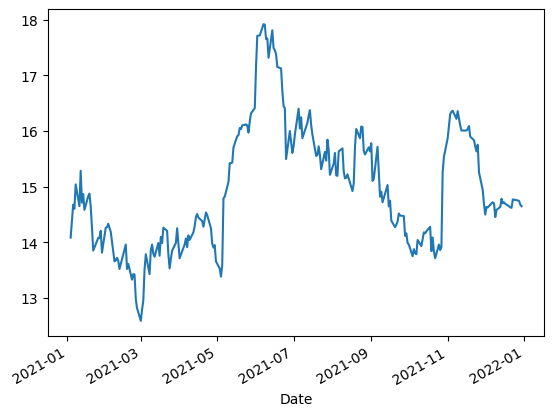

In [111]:
cotacoes_ibov_adjclose_abev.plot();

Como o resultado foi apenas uma coluna ele retorna uma Série do pandas.

Usando pd.DataFrame podemos reconfigura-lo como dataframe (mais uma forma).

In [112]:
cotacoes_ibov_adjclose_abev = pd.DataFrame(cotacoes_ibov_adjclose_abev)
cotacoes_ibov_adjclose_abev.head()

,Adj Close
,ABEV3.SA
Date,
2021-01-04 00:00:00,14.085717
2021-01-05 00:00:00,14.385996
2021-01-06 00:00:00,14.677172
2021-01-07 00:00:00,14.604377
2021-01-08 00:00:00,15.041145


## 2.7. Tratanto dados faltantes (NAs e NaN)

### 2.7.1. Checar o número de NaN do dataset

O método mais básico para checar os missings é o isna()

Ele retorna um booleano (True/False).

In [113]:
cotacoes_ibov.isna()

Adj Close                                                        \
            ABEV3.SA ALPA4.SA AMER3.SA ARZZ3.SA ASAI3.SA AZUL4.SA B3SA3.SA   
Date                                                                         
2021-01-04     False    False    False    False     True    False    False   
2021-01-05     False    False    False    False     True    False    False   
2021-01-06     False    False    False    False     True    False    False   
2021-01-07     False    False    False    False     True    False    False   
2021-01-08     False    False    False    False     True    False    False   
...              ...      ...      ...      ...      ...      ...      ...   
2021-12-23     False    False    False    False    False    False    False   
2021-12-27     False    False    False    False    False    False    False   
2021-12-28     False    False    False    False    False    False    False   
2021-12-29     False    False    False    False    False    False    False   
2021-12-30     False    False    False    False    False    False    False   

                                       ...   Volume                    \
           BBAS3.SA BBDC3.SA BBDC4.SA  ... TIMS3.SA TOTS3.SA UGPA3.SA   
Date                                   ...                              
2021-01-04    False    False    False  ...    False    False    False   
2021-01-05    False    False    False  ...    False    False    False   
2021-01-06    False    False    False  ...    False    False    False   
2021-01-07    False    False    False  ...    False    False    False   
2021-01-08    False    False    False  ...    False    False    False   
...             ...      ...      ...  ...      ...      ...      ...   
2021-12-23    False    False    False  ...    False    False    False   
2021-12-27    False    False    False  ...    False    False    False   
2021-12-28    False    False    False  ...    False    False    False   
2021-12-29    False    False    False  ...    False    False    False   
2021-12-30    False    False    False  ...    False    False    False   

                                                                           
           USIM5.SA VALE3.SA VBBR3.SA VIIA3.SA VIVT3.SA WEGE3.SA YDUQ3.SA  
Date                                                                       
2021-01-04    False    False    False    False    False    False    False  
2021-01-05    False    False    False    False    False    False    False  
2021-01-06    False    False    False    False    False    False    False  
2021-01-07    False    False    False    False    False    False    False  
2021-01-08    False    False    False    False    False    False    False  
...             ...      ...      ...      ...      ...      ...      ...  
2021-12-23    False    False    False    False    False    False    False  
2021-12-27    False    False    False    False    False    False    False  
2021-12-28    False    False    False    False    False    False    False  
2021-12-29    False    False    False    False    False    False    False  
2021-12-30    False    False    False    False    False    False    False  

[247 rows x 546 columns]

No Python o True equivale a 1 e False equivale a 0. Se somarmos uma coluna/linha composta por True/False conseguiremos saber quantos True existem (que nesse caso equivale a saber quantos NAs existem)

In [114]:
cotacoes_ibov.isna().sum()

Adj Close  ABEV3.SA     0
           ALPA4.SA     0
           AMER3.SA     0
           ARZZ3.SA     0
           ASAI3.SA    37
                       ..
Volume     VBBR3.SA     0
           VIIA3.SA     0
           VIVT3.SA     0
           WEGE3.SA     0
           YDUQ3.SA     0
Length: 546, dtype: int64

Verificando o percentual de Nulos:

In [115]:
# O atributo shape retorna o número de linhas e coluna de um dataframe
cotacoes_ibov.shape

(247, 546)

In [116]:
# Salvando em uma variável o resultado da soma de nulos por linha
count_null = cotacoes_ibov.isna().sum()

In [117]:
# Dividindo a qtd de nulos por linha pelo total de linhas temos o % de nulos em cada linhas
count_null / cotacoes_ibov.shape[0]

Adj Close  ABEV3.SA    0.000000
           ALPA4.SA    0.000000
           AMER3.SA    0.000000
           ARZZ3.SA    0.000000
           ASAI3.SA    0.149798
                         ...   
Volume     VBBR3.SA    0.000000
           VIIA3.SA    0.000000
           VIVT3.SA    0.000000
           WEGE3.SA    0.000000
           YDUQ3.SA    0.000000
Length: 546, dtype: float64

Com essas informações podemos, por exemplo, fazer um filtro para retornar quais linhas possuem uma fração específica de nulos

A função sum() do Pandas é usada para calcular a soma dos valores em um DataFrame ou em uma Série.

A soma é realizada ao longo de um eixo específico (linhas ou colunas), o que permite obter a soma de valores em uma determinada direção.

Por padrão ela soma cada coluna separadamente, resultando em uma Série de somas das colunas.

Mas podemos usar o parâmetro axis para especificar se desejamos somar ao longo das colunas (0) ou das linhas (1).

In [118]:
# Filtrando as linhas que tem pelo menos 1 valor nulo
cotacoes_ibov.isna().sum(axis = 1) > 0

Date
2021-01-04    True
2021-01-05    True
2021-01-06    True
2021-01-07    True
2021-01-08    True
              ... 
2021-12-23    True
2021-12-27    True
2021-12-28    True
2021-12-29    True
2021-12-30    True
Length: 247, dtype: bool

In [119]:
# Filtrando o cotacoes_ibov apenas com as linhas que tenham mais de 1 nulo
cotacoes_ibov[cotacoes_ibov.isna().sum(axis=1) > 0]

Adj Close                                                         \
             ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-01-04  14.085717  41.191307  73.699677  64.887436        NaN  37.730000   
2021-01-05  14.385996  41.211086  72.052757  63.895031        NaN  38.200001   
2021-01-06  14.677172  38.966091  67.347267  60.116299        NaN  36.669998   
2021-01-07  14.604377  38.273800  65.984634  60.039959        NaN  36.049999   
2021-01-08  15.041145  40.251770  70.582291  61.165951        NaN  36.599998   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  14.771684  36.379086  30.124914  71.607521  13.893169  26.459999   
2021-12-27  14.752684  36.488602  31.271875  72.321968  13.449456  25.670000   
2021-12-28  14.743185  36.588161  30.419008  72.505394  12.917000  25.750000   
2021-12-29  14.676688  36.189922  30.409204  71.810265  12.660631  23.860001   
2021-12-30  14.648190  36.856972  30.958178  74.117691  12.778955  24.360001   

                                                        ...    Volume  \
             B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...  TIMS3.SA   
Date                                                    ...             
2021-01-04  18.290253  30.328728  16.965784  19.124651  ...   3897800   
2021-01-05  18.326244  30.014076  16.884672  19.008043  ...   8506600   
2021-01-06  18.026302  30.699886  17.309120  19.638020  ...   9998400   
2021-01-07  18.530201  31.918198  17.733574  20.159391  ...  11072300   
2021-01-08  18.803146  32.103767  17.596888  19.985603  ...   5816400   
...               ...        ...        ...        ...  ...       ...   
2021-12-23  10.640840  25.399118  13.477399  16.014019  ...   2893300   
2021-12-27  10.575386  25.451275  13.618390  16.197132  ...   7282600   
2021-12-28  10.435129  25.303503  13.610096  16.138863  ...   3367300   
2021-12-29  10.360327  25.173115  13.510575  16.063959  ...   2589100   
2021-12-30  10.416430  25.077503  13.427637  15.989043  ...   7149400   

                                                                               \
           TOTS3.SA UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA VIVT3.SA   
Date                                                                            
2021-01-04  5429700  5472800  20687900  37865500   3953500  44372400  2791400   
2021-01-05  4430700  5428300  18302900  34300300  12993100  41436700  2899200   
2021-01-06  5512800  6564800  23592900  53722500  10884000  49797300  5790100   
2021-01-07  3322500  5638900  22298600  74541400   6954300  70842700  5213500   
2021-01-08  8427300  4449400  23237000  58562700   8434100  58505800  2916600   
...             ...      ...       ...       ...       ...       ...      ...   
2021-12-23  2731000  2238400  10681800  13121200   3932100  30613400  1382200   
2021-12-27  3040900  5340800  10504500  11371400   4196700  35550300  1492300   
2021-12-28  3269600  3777100  13201600  18923700   3743000  25433400  1060000   
2021-12-29  3205000  3591300  10525500  12113500   3630700  22334300   930200   
2021-12-30  4400600  8871300  12815100  26568500  13547600  58310400  2392600   

                               
            WEGE3.SA YDUQ3.SA  
Date                           
2021-01-04   7219800  2640400  
2021-01-05  16633600  3703500  
2021-01-06  21507400  5004000  
2021-01-07  15129600  6138600  
2021-01-08  17381000  2685800  
...              ...      ...  
2021-12-23   2166400  1731000  
2021-12-27   4457200  1809000  
2021-12-28   3670800  1710500  
2021-12-29   3091700  1342300  
2021-12-30   4858300  2053000  

[247 rows x 546 columns]

Vamos filtrar apenas as linhas que tenham integridade, ou não-nulos de pelo menos 90% (menos que 10%):

In [120]:
cotacoes_ibov.isna().sum() / len(cotacoes_ibov) < 0.1

Adj Close  ABEV3.SA     True
           ALPA4.SA     True
           AMER3.SA     True
           ARZZ3.SA     True
           ASAI3.SA    False
                       ...  
Volume     VBBR3.SA     True
           VIIA3.SA     True
           VIVT3.SA     True
           WEGE3.SA     True
           YDUQ3.SA     True
Length: 546, dtype: bool

Agora um filtro mais complexo, onde os nulos representem mais de 50% dos dados de uma linha (NAs da linha/total de colunas > 0.5).

In [121]:
(cotacoes_ibov.isna().sum(1)/len(cotacoes_ibov.columns)) > 0.5

Date
2021-01-04    False
2021-01-05    False
2021-01-06    False
2021-01-07    False
2021-01-08    False
              ...  
2021-12-23    False
2021-12-27    False
2021-12-28    False
2021-12-29    False
2021-12-30    False
Length: 247, dtype: bool

In [122]:
cotacoes_ibov[(cotacoes_ibov.isna().sum(1)/len(cotacoes_ibov.columns)) > 0.5]

Empty DataFrame
Columns: [(Adj Close, ABEV3.SA), (Adj Close, ALPA4.SA), (Adj Close, AMER3.SA), (Adj Close, ARZZ3.SA), (Adj Close, ASAI3.SA), (Adj Close, AZUL4.SA), (Adj Close, B3SA3.SA), (Adj Close, BBAS3.SA), (Adj Close, BBDC3.SA), (Adj Close, BBDC4.SA), (Adj Close, BBSE3.SA), (Adj Close, BEEF3.SA), (Adj Close, BPAC11.SA), (Adj Close, BPAN4.SA), (Adj Close, BRAP4.SA), (Adj Close, BRFS3.SA), (Adj Close, BRKM5.SA), (Adj Close, BRML3.SA), (Adj Close, CASH3.SA), (Adj Close, CCRO3.SA), (Adj Close, CIEL3.SA), (Adj Close, CMIG4.SA), (Adj Close, CMIN3.SA), (Adj Close, COGN3.SA), (Adj Close, CPFE3.SA), (Adj Close, CPLE6.SA), (Adj Close, CRFB3.SA), (Adj Close, CSAN3.SA), (Adj Close, CSNA3.SA), (Adj Close, CVCB3.SA), (Adj Close, CYRE3.SA), (Adj Close, DXCO3.SA), (Adj Close, ECOR3.SA), (Adj Close, EGIE3.SA), (Adj Close, ELET3.SA), (Adj Close, ELET6.SA), (Adj Close, EMBR3.SA), (Adj Close, ENBR3.SA), (Adj Close, ENEV3.SA), (Adj Close, ENGI11.SA), (Adj Close, EQTL3.SA), (Adj Close, EZTC3.SA), (Adj Close, FLRY3.SA), (Adj Close, GGBR4.SA), (Adj Close, GOAU4.SA), (Adj Close, GOLL4.SA), (Adj Close, HAPV3.SA), (Adj Close, HYPE3.SA), (Adj Close, IGTI11.SA), (Adj Close, IRBR3.SA), (Adj Close, ITSA4.SA), (Adj Close, ITUB4.SA), (Adj Close, JBSS3.SA), (Adj Close, KLBN11.SA), (Adj Close, LREN3.SA), (Adj Close, LWSA3.SA), (Adj Close, MGLU3.SA), (Adj Close, MRFG3.SA), (Adj Close, MRVE3.SA), (Adj Close, MULT3.SA), (Adj Close, NTCO3.SA), (Adj Close, PCAR3.SA), (Adj Close, PETR3.SA), (Adj Close, PETR4.SA), (Adj Close, PETZ3.SA), (Adj Close, POSI3.SA), (Adj Close, PRIO3.SA), (Adj Close, QUAL3.SA), (Adj Close, RADL3.SA), (Adj Close, RAIL3.SA), (Adj Close, RAIZ4.SA), (Adj Close, RDOR3.SA), (Adj Close, RENT3.SA), (Adj Close, RRRP3.SA), (Adj Close, SANB11.SA), (Adj Close, SBSP3.SA), (Adj Close, SLCE3.SA), (Adj Close, SMTO3.SA), (Adj Close, SOMA3.SA), (Adj Close, SUZB3.SA), (Adj Close, TAEE11.SA), (Adj Close, TIMS3.SA), (Adj Close, TOTS3.SA), (Adj Close, UGPA3.SA), (Adj Close, USIM5.SA), (Adj Close, VALE3.SA), (Adj Close, VBBR3.SA), (Adj Close, VIIA3.SA), (Adj Close, VIVT3.SA), (Adj Close, WEGE3.SA), (Adj Close, YDUQ3.SA), (Close, ABEV3.SA), (Close, ALPA4.SA), (Close, AMER3.SA), (Close, ARZZ3.SA), (Close, ASAI3.SA), (Close, AZUL4.SA), (Close, B3SA3.SA), (Close, BBAS3.SA), (Close, BBDC3.SA), ...]
Index: []

[0 rows x 546 columns]

In [123]:
cotacoes_ibov[(cotacoes_ibov.isna().sum(1)/len(cotacoes_ibov.columns)) < 0.5]

Adj Close                                                         \
             ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-01-04  14.085717  41.191307  73.699677  64.887436        NaN  37.730000   
2021-01-05  14.385996  41.211086  72.052757  63.895031        NaN  38.200001   
2021-01-06  14.677172  38.966091  67.347267  60.116299        NaN  36.669998   
2021-01-07  14.604377  38.273800  65.984634  60.039959        NaN  36.049999   
2021-01-08  15.041145  40.251770  70.582291  61.165951        NaN  36.599998   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  14.771684  36.379086  30.124914  71.607521  13.893169  26.459999   
2021-12-27  14.752684  36.488602  31.271875  72.321968  13.449456  25.670000   
2021-12-28  14.743185  36.588161  30.419008  72.505394  12.917000  25.750000   
2021-12-29  14.676688  36.189922  30.409204  71.810265  12.660631  23.860001   
2021-12-30  14.648190  36.856972  30.958178  74.117691  12.778955  24.360001   

                                                        ...    Volume  \
             B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...  TIMS3.SA   
Date                                                    ...             
2021-01-04  18.290253  30.328728  16.965784  19.124651  ...   3897800   
2021-01-05  18.326244  30.014076  16.884672  19.008043  ...   8506600   
2021-01-06  18.026302  30.699886  17.309120  19.638020  ...   9998400   
2021-01-07  18.530201  31.918198  17.733574  20.159391  ...  11072300   
2021-01-08  18.803146  32.103767  17.596888  19.985603  ...   5816400   
...               ...        ...        ...        ...  ...       ...   
2021-12-23  10.640840  25.399118  13.477399  16.014019  ...   2893300   
2021-12-27  10.575386  25.451275  13.618390  16.197132  ...   7282600   
2021-12-28  10.435129  25.303503  13.610096  16.138863  ...   3367300   
2021-12-29  10.360327  25.173115  13.510575  16.063959  ...   2589100   
2021-12-30  10.416430  25.077503  13.427637  15.989043  ...   7149400   

                                                                               \
           TOTS3.SA UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA VIVT3.SA   
Date                                                                            
2021-01-04  5429700  5472800  20687900  37865500   3953500  44372400  2791400   
2021-01-05  4430700  5428300  18302900  34300300  12993100  41436700  2899200   
2021-01-06  5512800  6564800  23592900  53722500  10884000  49797300  5790100   
2021-01-07  3322500  5638900  22298600  74541400   6954300  70842700  5213500   
2021-01-08  8427300  4449400  23237000  58562700   8434100  58505800  2916600   
...             ...      ...       ...       ...       ...       ...      ...   
2021-12-23  2731000  2238400  10681800  13121200   3932100  30613400  1382200   
2021-12-27  3040900  5340800  10504500  11371400   4196700  35550300  1492300   
2021-12-28  3269600  3777100  13201600  18923700   3743000  25433400  1060000   
2021-12-29  3205000  3591300  10525500  12113500   3630700  22334300   930200   
2021-12-30  4400600  8871300  12815100  26568500  13547600  58310400  2392600   

                               
            WEGE3.SA YDUQ3.SA  
Date                           
2021-01-04   7219800  2640400  
2021-01-05  16633600  3703500  
2021-01-06  21507400  5004000  
2021-01-07  15129600  6138600  
2021-01-08  17381000  2685800  
...              ...      ...  
2021-12-23   2166400  1731000  
2021-12-27   4457200  1809000  
2021-12-28   3670800  1710500  
2021-12-29   3091700  1342300  
2021-12-30   4858300  2053000  

[247 rows x 546 columns]

Nenhuma linha possui tantos NAs..

#### Método dropna()

O método .dropna() é utilizado para remover linhas que tenham NA

Para efetivar no próprio dataframe a mudança é necessário passar o argumento inplace=True

In [124]:
# Realizar uma cópia do dataframe original
copy_cotacoes_ibov = cotacoes_ibov.copy()

# Excluindo os dados nulos do dataframe
# Passamos o argumento subset que significa que ele vai buscar nulos apenas nesse subset específico
# Nesse caso Adj Close de ASAI3
copy_cotacoes_ibov.dropna(subset = [('Adj Close', 'ASAI3.SA')], inplace = True)
copy_cotacoes_ibov.isna().sum()

Adj Close  ABEV3.SA    0
           ALPA4.SA    0
           AMER3.SA    0
           ARZZ3.SA    0
           ASAI3.SA    0
                      ..
Volume     VBBR3.SA    0
           VIIA3.SA    0
           VIVT3.SA    0
           WEGE3.SA    0
           YDUQ3.SA    0
Length: 546, dtype: int64

##### **Praticando:**

Encontre as colunas que tenham pelo menos 1 NA

In [125]:
cotacoes_ibov.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'ARZZ3.SA'),
            ('Adj Close', 'ASAI3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIIA3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           length=546)

In [126]:
type(cotacoes_ibov.columns)

pandas.core.indexes.multi.MultiIndex

In [127]:
# Filtrando somente as colunas que a soma dos nulos seja maior ou igual a 1
cotacoes_ibov.columns[cotacoes_ibov.isna().sum(0) >= 1]

MultiIndex([('Adj Close',  'ASAI3.SA'),
            ('Adj Close',  'BRML3.SA'),
            ('Adj Close',  'CMIN3.SA'),
            ('Adj Close',  'ENBR3.SA'),
            ('Adj Close', 'IGTI11.SA'),
            ('Adj Close',  'RAIZ4.SA'),
            (    'Close',  'ASAI3.SA'),
            (    'Close',  'BRML3.SA'),
            (    'Close',  'CMIN3.SA'),
            (    'Close',  'ENBR3.SA'),
            (    'Close', 'IGTI11.SA'),
            (    'Close',  'RAIZ4.SA'),
            (     'High',  'ASAI3.SA'),
            (     'High',  'BRML3.SA'),
            (     'High',  'CMIN3.SA'),
            (     'High',  'ENBR3.SA'),
            (     'High', 'IGTI11.SA'),
            (     'High',  'RAIZ4.SA'),
            (      'Low',  'ASAI3.SA'),
            (      'Low',  'BRML3.SA'),
            (      'Low',  'CMIN3.SA'),
            (      'Low',  'ENBR3.SA'),
            (      'Low', 'IGTI11.SA'),
            (      'Low',  'RAIZ4.SA'),
            (     'Open',  'ASAI3.SA'),


### 2.7.2. Diferentes formas de lidar com os NaN (não existe uma ideal, cada caso deve ser avaliado separadamente)

In [128]:
# Vamos pegar um novo conjunto de dados
df_bbas = yf.download('BBAS3.SA', start='2022-12-28', end='2023-01-03')[['Open', 'Close']]
df_bbas.head()

[*********************100%%**********************]  1 of 1 completed


,Open,Close
Date,,
2022-12-28,34.099998,34.669998
2022-12-29,34.830002,34.730000
2023-01-02,34.220001,33.259998


O método `asfreq` no Pandas é usado para reamostrar uma série temporal (Time Series) de acordo com uma **nova frequência desejada**.

É útil quando temos dados em uma série temporal com uma frequência específica, e desejamos ajustá-los para uma frequência diferente.

Ele permite essa ressintonização, preenchendo os valores ausentes, se necessário.

Ele tem vários argumentos, mas o mais importante é o `freq`, que especifica a nova frequência desejada, especificada em um formato reconhecido pelo Pandas, como por exemplo: **"D" para diária**, **"H" para horária**, **"M" para mensal** e etc.

In [129]:
# Note que ele força os dias que não teve pregão e preenche com os valores NaN
# Vamos usar esse método para "forçar" alguns dados nulos
df_bbas = df_bbas.asfreq('D')
df_bbas

,Open,Close
Date,,
2022-12-28,34.099998,34.669998
2022-12-29,34.830002,34.730000
2022-12-30,NaN,NaN
2022-12-31,NaN,NaN
2023-01-01,NaN,NaN
2023-01-02,34.220001,33.259998


In [130]:
# Vamos criar uma nova coluna "shiftando" o valor de Fechamento 1 dia pra frente
df_bbas['Shifted'] = df_bbas.Close.shift(1)
df_bbas

,Open,Close,Shifted
Date,,,
2022-12-28,34.099998,34.669998,NaN
2022-12-29,34.830002,34.730000,34.669998
2022-12-30,NaN,NaN,34.730000
2022-12-31,NaN,NaN,NaN
2023-01-01,NaN,NaN,NaN
2023-01-02,34.220001,33.259998,NaN


Existe ainda uma outra forma de visualizar quanto os NaN representam em nosso dataset, através da função info()

In [131]:
df_bbas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2022-12-28 to 2023-01-02
Freq: D
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     3 non-null      float64
 1   Close    3 non-null      float64
 2   Shifted  2 non-null      float64
dtypes: float64(3)
memory usage: 192.0 bytes


Agora que temos um dataframe com dados nulos.

Vamos usar um limite de dados non-null para filtrá-lo

Ex., manter linhas que possuam pelo menos 2 dados não-nulos

In [132]:
# O argumento thresh é usado para especificar o número mínimo de valores não nulos
# em uma linha ou coluna para que ela não seja removida.
# Definimos 2 e ele excluiu todas as linhas com mais de 2 valores nulos
df_bbas_dropna = df_bbas.dropna(axis = 0, thresh = 2)
df_bbas_dropna

,Open,Close,Shifted
Date,,,
2022-12-28,34.099998,34.669998,NaN
2022-12-29,34.830002,34.730000,34.669998
2023-01-02,34.220001,33.259998,NaN


Caso não desejamos simplesmente remover os valores nulos, temos algumas opções de preenchimento:

In [133]:
# Preencher os dados nulos com o valor 0
df_bbas_fill0 = df_bbas.fillna(0)
df_bbas_fill0

,Open,Close,Shifted
Date,,,
2022-12-28,34.099998,34.669998,0.000000
2022-12-29,34.830002,34.730000,34.669998
2022-12-30,0.000000,0.000000,34.730000
2022-12-31,0.000000,0.000000,0.000000
2023-01-01,0.000000,0.000000,0.000000
2023-01-02,34.220001,33.259998,0.000000


In [134]:
# Preencher com algum valor específico
df_bbas_fill9 = df_bbas.fillna(99999)
df_bbas_fill9

,Open,Close,Shifted
Date,,,
2022-12-28,34.099998,34.669998,99999.000000
2022-12-29,34.830002,34.730000,34.669998
2022-12-30,99999.000000,99999.000000,34.730000
2022-12-31,99999.000000,99999.000000,99999.000000
2023-01-01,99999.000000,99999.000000,99999.000000
2023-01-02,34.220001,33.259998,99999.000000


In [135]:
# Preenche os NaN de cada coluna com um valor desejado
# Para isso especificar com um dicionário
df_bbas_dict = df_bbas.fillna({"Open": 0, "Close": 1, "Shifted": 2})
df_bbas_dict

,Open,Close,Shifted
Date,,,
2022-12-28,34.099998,34.669998,2.000000
2022-12-29,34.830002,34.730000,34.669998
2022-12-30,0.000000,1.000000,34.730000
2022-12-31,0.000000,1.000000,2.000000
2023-01-01,0.000000,1.000000,2.000000
2023-01-02,34.220001,33.259998,2.000000


#### Forward Filling ou Backward Filling

ffill (forward) = passa o valor prévio "para a frente", ou seja,
preenche com o valor prévio disponível (útil em séries temporais)

In [136]:
df_bbas.Close.fillna(method = 'ffill')

Date
2022-12-28    34.669998
2022-12-29    34.730000
2022-12-30    34.730000
2022-12-31    34.730000
2023-01-01    34.730000
2023-01-02    33.259998
Freq: D, Name: Close, dtype: float64

bfill (backward) = traz o próximo valor disponível para trás

In [137]:
df_bbas.Close.fillna(method = 'bfill')

Date
2022-12-28    34.669998
2022-12-29    34.730000
2022-12-30    33.259998
2022-12-31    33.259998
2023-01-01    33.259998
2023-01-02    33.259998
Freq: D, Name: Close, dtype: float64

Preencher os NaNs com métricas do próprio conjunto de dados

In [138]:
# PReenchendo com a média da abertura e a mediana do fechamento
df_bbas.fillna({'Open':df_bbas.Open.mean(), 'Close': df_bbas.Close.median()})

,Open,Close,Shifted
Date,,,
2022-12-28,34.099998,34.669998,NaN
2022-12-29,34.830002,34.730000,34.669998
2022-12-30,34.383334,34.669998,34.730000
2022-12-31,34.383334,34.669998,NaN
2023-01-01,34.383334,34.669998,NaN
2023-01-02,34.220001,33.259998,NaN


Existe ainda a opção de interpolar os valores.

Para isso existem vários métodos, como:

linear, nearest, zero, slinear, quadratic, cubic, spline, barycentric, polynomial.

Vai depender de cada caso

In [139]:
df_bbas['Interpolate'] = df_bbas.Close.interpolate(method = 'linear')
df_bbas

,Open,Close,Shifted,Interpolate
Date,,,,
2022-12-28,34.099998,34.669998,NaN,34.669998
2022-12-29,34.830002,34.730000,34.669998,34.730000
2022-12-30,NaN,NaN,34.730000,34.362499
2022-12-31,NaN,NaN,NaN,33.994999
2023-01-01,NaN,NaN,NaN,33.627499
2023-01-02,34.220001,33.259998,NaN,33.259998


Visualizando os dados interpolados com equação linear

<Axes: xlabel='Close', ylabel='Close'>

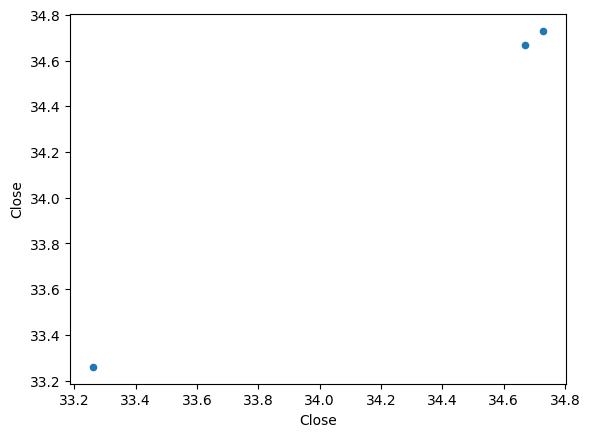

In [140]:
df_bbas.plot.scatter(x = 'Close', y = 'Close')

<Axes: xlabel='Interpolate', ylabel='Interpolate'>

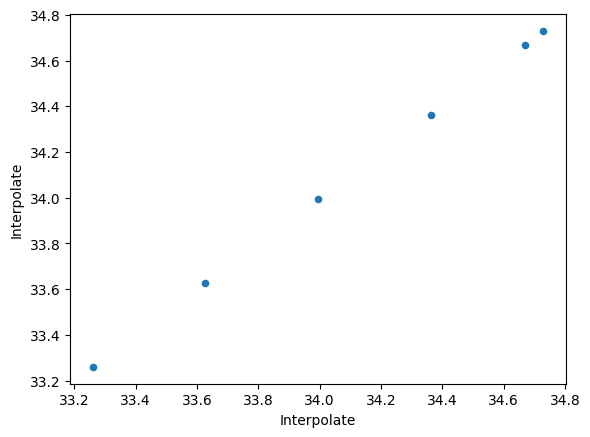

In [141]:
df_bbas.plot.scatter(x = 'Interpolate', y = 'Interpolate')

### 2.7.3. Visualização para dados de cotações em séries longas

As técnicas utilizadas anteriormente podem ser muito úteis nos mais diversos dataframes e conjuntos de dados.

Pensando em OHLC de séries temporais longas, vejamos um pouco mais essas técnicas

Vamos abrir uma base de dados externa.

Trabalhar NA é uma coisa extramamente importante que merece dedicar tempo.

In [142]:
dados = pd.read_csv('Bovespa.csv', index_col="Date")
dados.head()

,ABCB4,BBAS3,BBDC4,BPAN4,BTOW3,CGAS3,CMIG4,CSNA3,CYRE3,ELET3,...,POMO4,QGEP3,RAPT4,SAPR4,SBSP3,SUZB5,TUPY3,USIM5,VALE5,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
6/5/2012,5.778904,13.193346,14.825962,NaN,4.67417,21.089613,16.403233,9.799454,13.011072,11.257472,...,3.559332,7.938090,6.136378,4.945431,19.482090,4.228104,18.623053,7.724799,28.628716,6.314218
6/6/2012,5.784656,13.474055,15.421063,NaN,4.95184,21.367132,17.082111,9.838496,13.979592,11.669867,...,3.727821,8.013066,6.316431,4.918369,19.842842,4.291890,18.852964,7.456715,29.472841,6.454251
6/8/2012,5.836405,13.488092,15.457347,NaN,5.08142,22.088638,17.082111,9.799454,14.025277,12.020839,...,3.694127,7.825626,6.338035,5.256635,19.926100,4.437686,18.535686,7.635437,29.727674,6.368317
6/11/2012,5.922663,13.614412,15.628112,NaN,5.09993,22.088638,17.120369,9.705755,13.723758,11.827804,...,3.753094,7.413257,6.482082,5.195747,20.203676,4.237216,17.629826,7.883664,29.377279,6.368317
6/12/2012,5.876658,13.614412,15.886813,NaN,5.34984,22.088638,17.689350,9.736986,13.632388,12.178778,...,3.799433,7.413257,6.482082,5.202512,20.739265,4.146093,17.933311,7.754586,30.038250,6.365140


Vamos criar um novo dataframe para uma ação específica

In [143]:
cyre = dados['CYRE3']

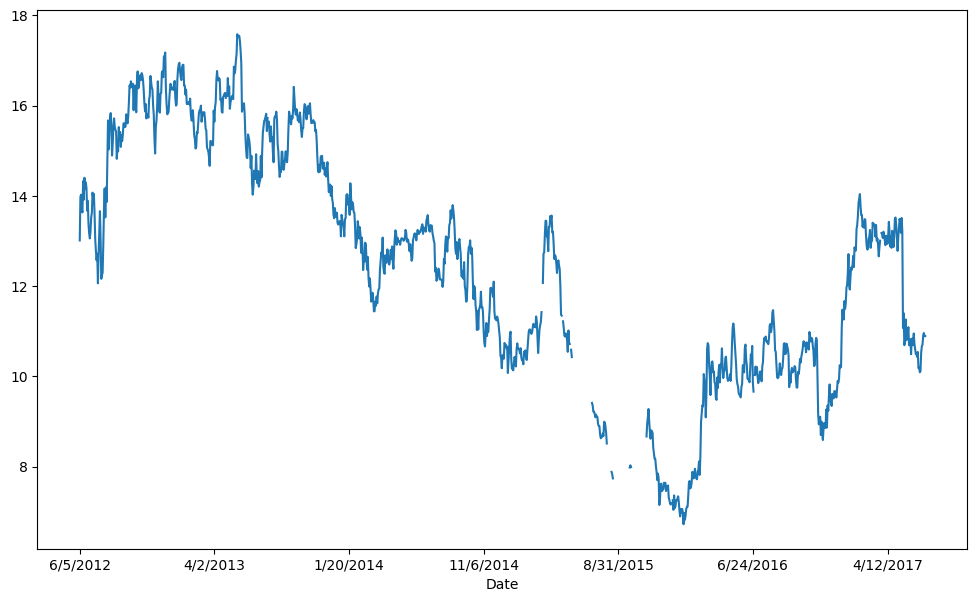

In [144]:
cyre.plot(figsize = (12,7));

In [145]:
# Transformar em df
cyre = pd.DataFrame(cyre)

O preenchimento usando a técnica de **"forward filling"** é normalmente o mais utilizado no mercado financeiro.

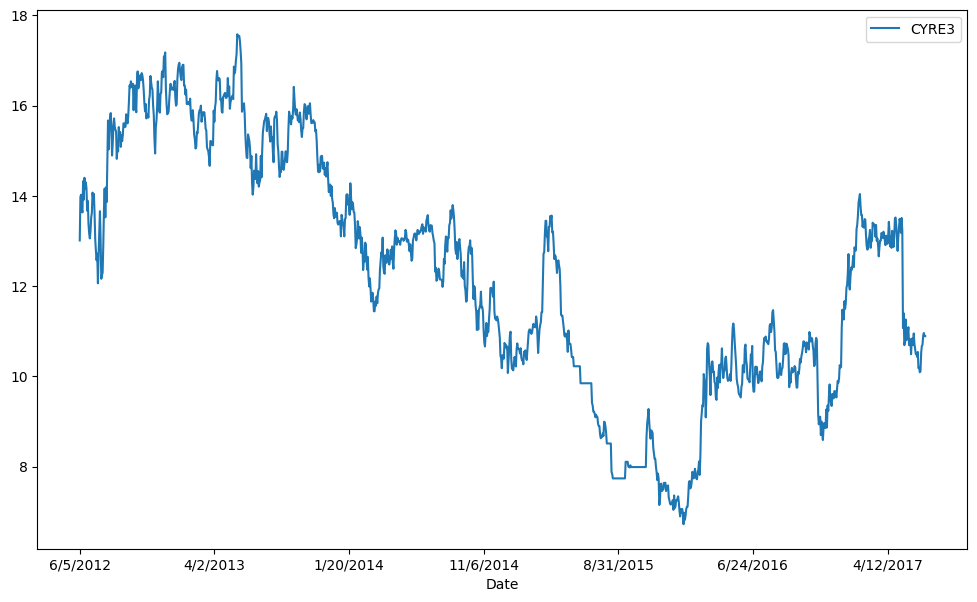

In [146]:
cyre2 = cyre.ffill(axis = 0)
cyre2.plot(figsize = (12,7));

Vamos pegar outra ação específica

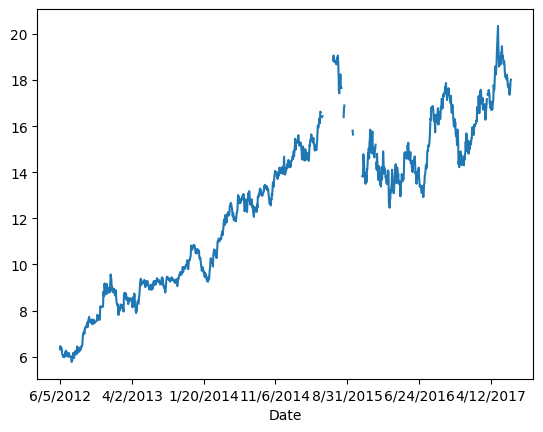

In [147]:
weg = dados['WEGE3']
weg.plot();

Preenchendo com 0, vejamos como fica

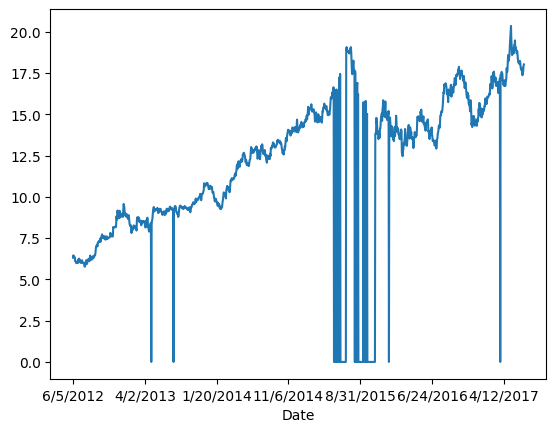

In [148]:
weg.fillna(0).plot();

Uma outra opção é o preenchimento com a média, o que para dados de mercado financeiro pode não fazer tanto sentido.

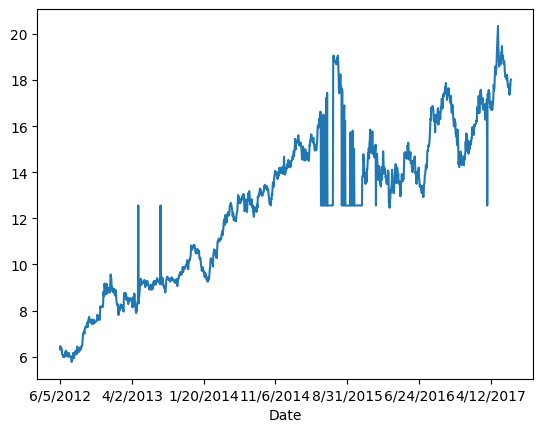

In [149]:
preco_medio = weg.mean()
weg.fillna(preco_medio).plot();

### 2.7.4. Biblioteca missingno

Vamos ver uma nova biblioteca que tem como objetivo analisar os missings.

É uma biblioteca que ajuda a entender melhor a proporção de dados faltantes.

De forma visual através de gráficos e mapa de calor.

In [150]:
!pip install missingno

In [151]:
import missingno as msno

<Axes: >

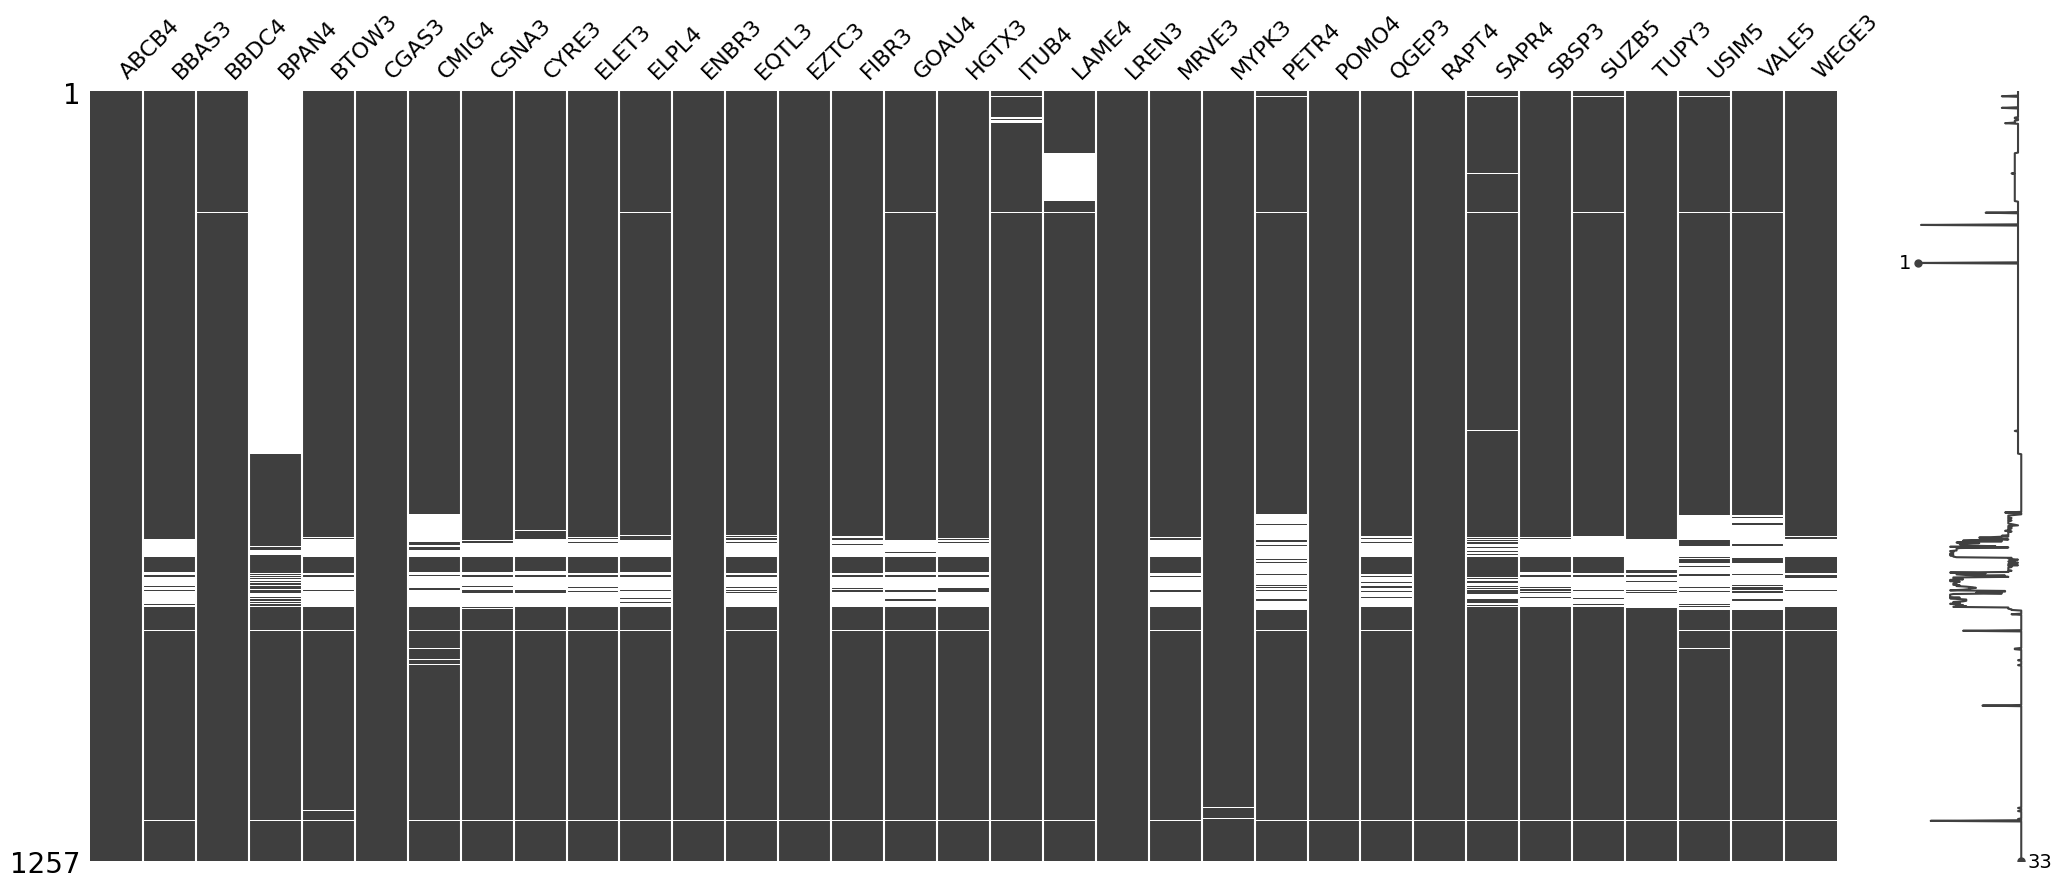

In [152]:
msno.matrix(dados)

<Axes: >

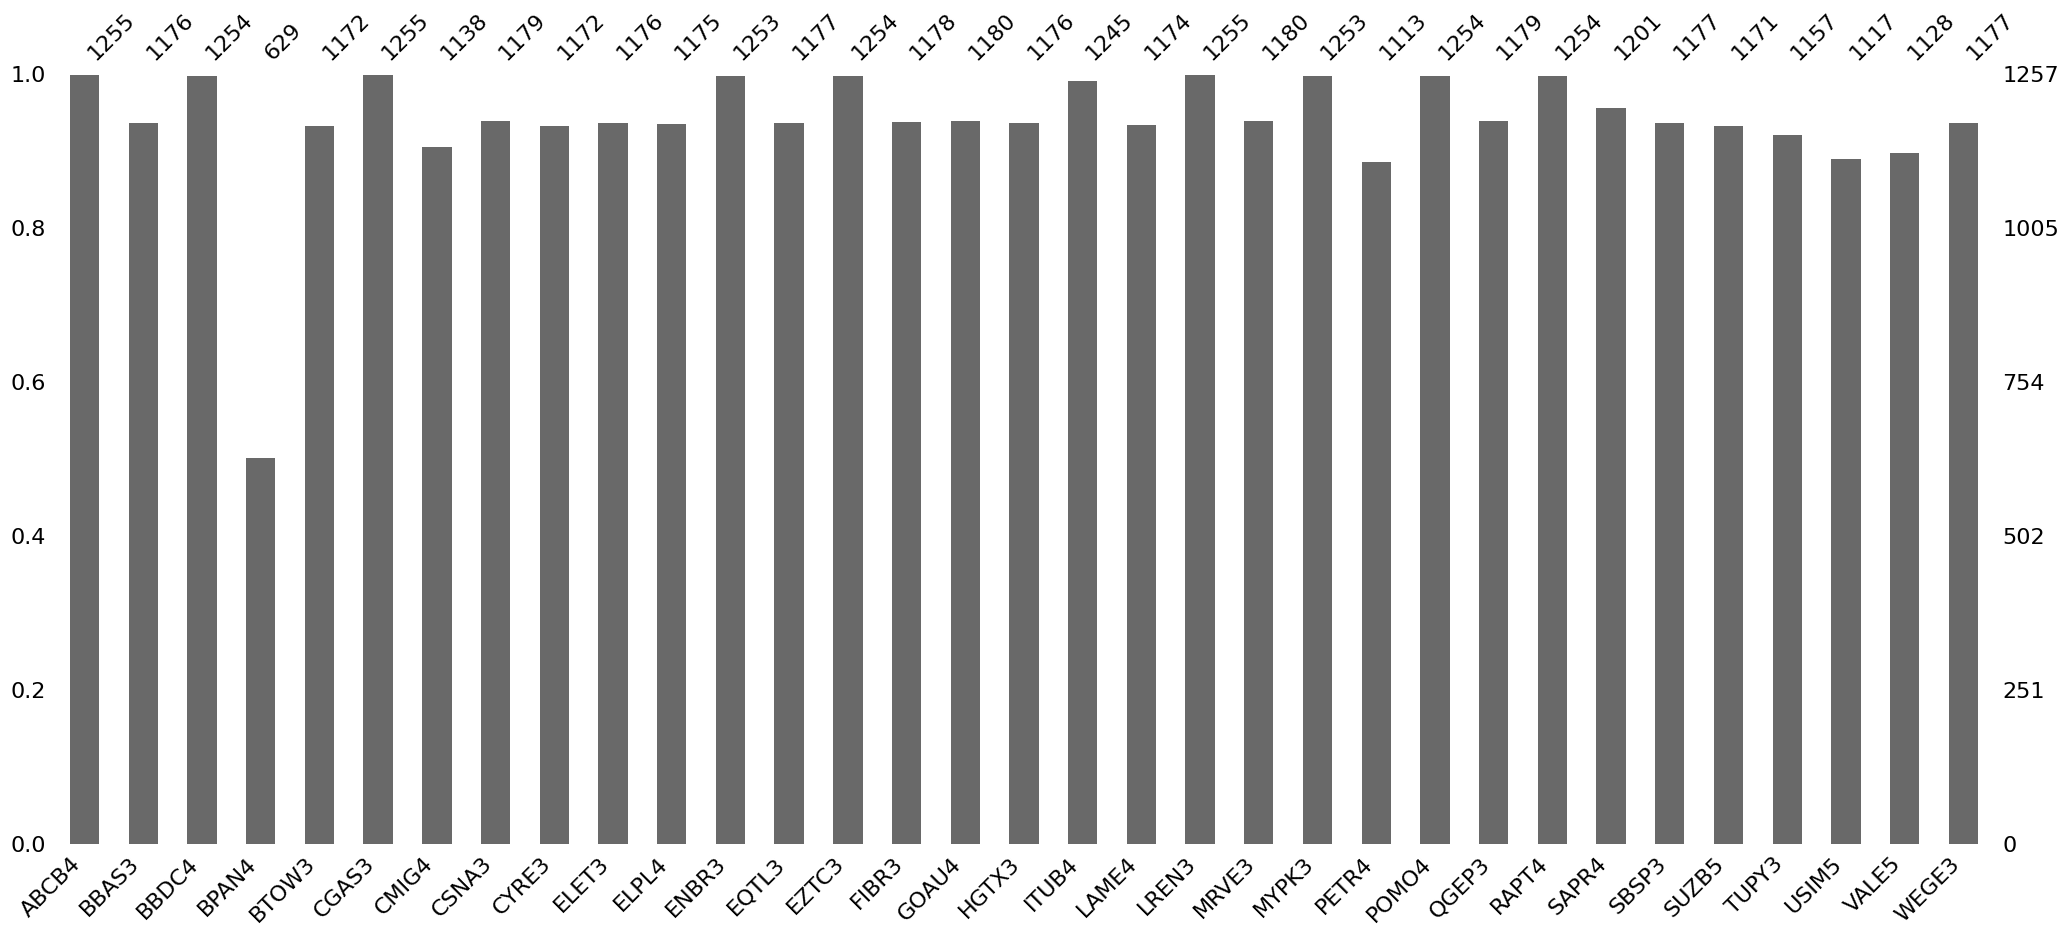

In [153]:
msno.bar(dados)

<Axes: >

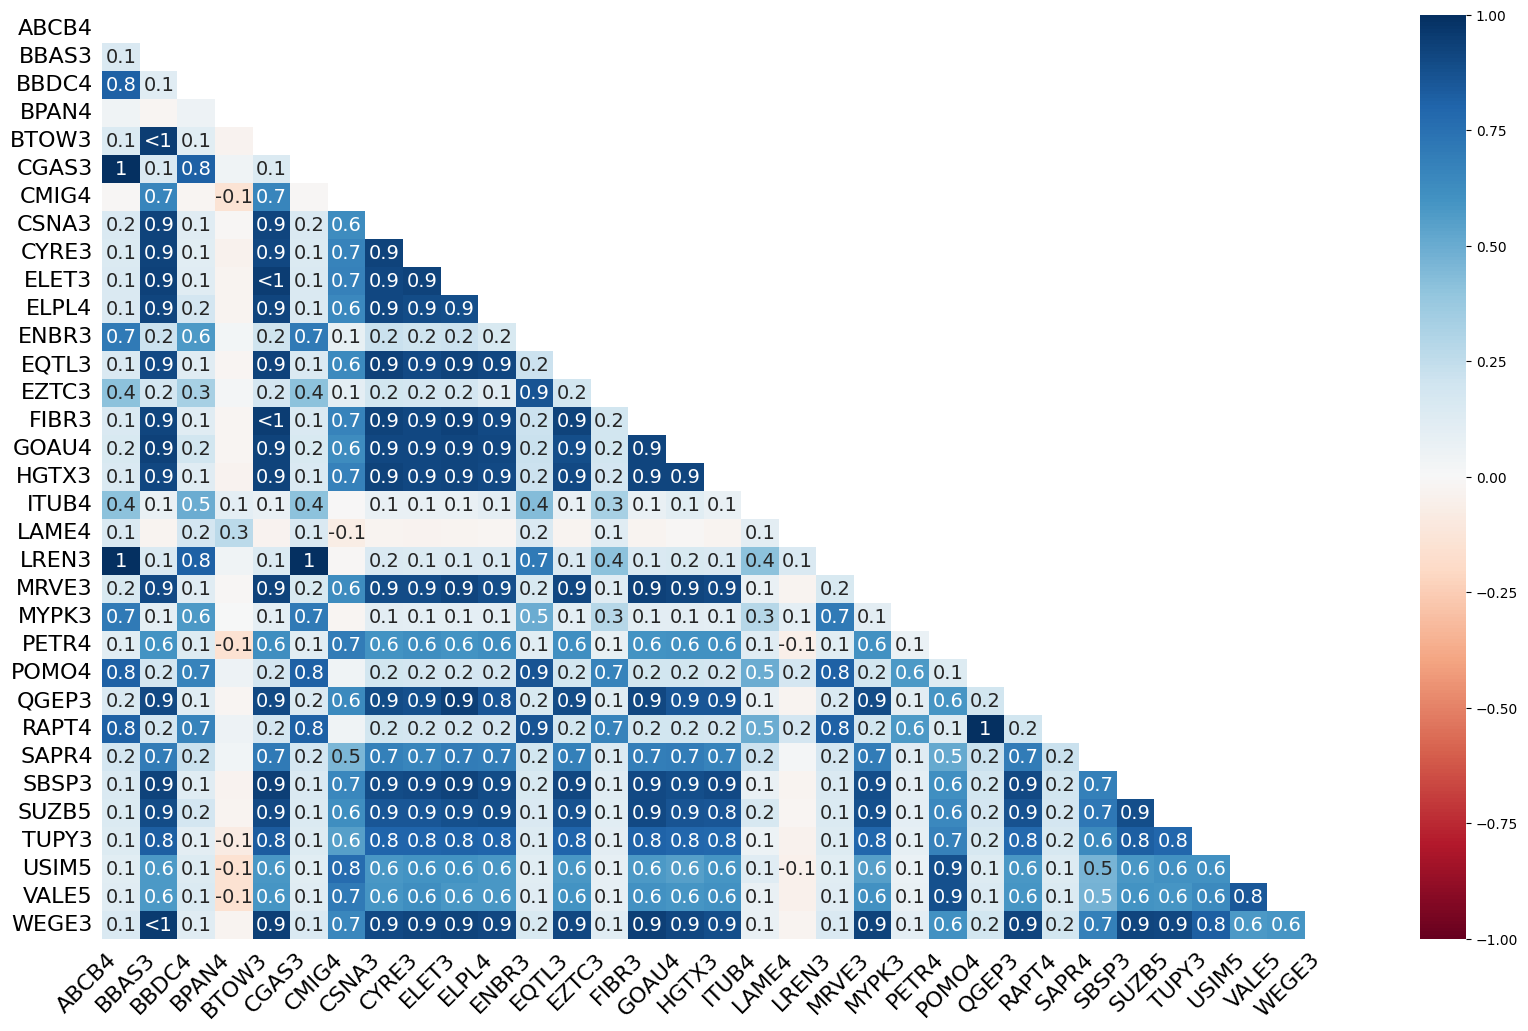

In [154]:
# Exibe a correlação entre o número de missings
# em diferentes colunas como um mapa de calor (heatmap)

msno.heatmap(dados)

## 2.8. Redução do número de colunas - "Wide to Long"

In [155]:
# Retomando ao DataFrame cotacoes_ibov
cotacoes_ibov.head()

Adj Close                                            \
                      ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA ASAI3.SA   
Date                                                                       
2021-01-04 00:00:00  14.085717  41.191307  73.699677  64.887436      NaN   
2021-01-05 00:00:00  14.385996  41.211086  72.052757  63.895031      NaN   
2021-01-06 00:00:00  14.677172  38.966091  67.347267  60.116299      NaN   
2021-01-07 00:00:00  14.604377  38.273800  65.984634  60.039959      NaN   
2021-01-08 00:00:00  15.041145  40.251770  70.582291  61.165951      NaN   

                                                                            \
                      AZUL4.SA   B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA   
Date                                                                         
2021-01-04 00:00:00  37.730000  18.290253  30.328728  16.965784  19.124651   
2021-01-05 00:00:00  38.200001  18.326244  30.014076  16.884672  19.008043   
2021-01-06 00:00:00  36.669998  18.026302  30.699886  17.309120  19.638020   
2021-01-07 00:00:00  36.049999  18.530201  31.918198  17.733574  20.159391   
2021-01-08 00:00:00  36.599998  18.803146  32.103767  17.596888  19.985603   

                     ...    Volume                                        \
                     ...  TIMS3.SA TOTS3.SA UGPA3.SA  USIM5.SA  VALE3.SA   
Date                 ...                                                   
2021-01-04 00:00:00  ...   3897800  5429700  5472800  20687900  37865500   
2021-01-05 00:00:00  ...   8506600  4430700  5428300  18302900  34300300   
2021-01-06 00:00:00  ...   9998400  5512800  6564800  23592900  53722500   
2021-01-07 00:00:00  ...  11072300  3322500  5638900  22298600  74541400   
2021-01-08 00:00:00  ...   5816400  8427300  4449400  23237000  58562700   

                                                                     
                     VBBR3.SA  VIIA3.SA VIVT3.SA  WEGE3.SA YDUQ3.SA  
Date                                                                 
2021-01-04 00:00:00   3953500  44372400  2791400   7219800  2640400  
2021-01-05 00:00:00  12993100  41436700  2899200  16633600  3703500  
2021-01-06 00:00:00  10884000  49797300  5790100  21507400  5004000  
2021-01-07 00:00:00   6954300  70842700  5213500  15129600  6138600  
2021-01-08 00:00:00   8434100  58505800  2916600  17381000  2685800  

[5 rows x 546 columns]

#### **Transformação wide to long**

**Melt**

O melt é utilizado na biblioteca pandas para realizar uma transformação que chamamos de "wide to long".

Ou seja, se tivermos um dataframe grande e largo podemos transformá-lo num dataframe longo, com poucas colunas mas com muitas linhas.

O que antes eram as colunas agora viram categorias em colunas novas, as "variáveis", e os valores são todos mostrados na coluna valor.

In [156]:
cotacoes_ibov_long = pd.melt(cotacoes_ibov, ignore_index = False)
cotacoes_ibov_long

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


#### Utilizando filtros de colunas nos DFs melted

In [157]:
# Filtrando apenas o fechamento da ação ABEV3
cotacoes_ibov_long_abev = cotacoes_ibov_long[(cotacoes_ibov_long['variable_0'] == 'Close') &
                                               (cotacoes_ibov_long['variable_1'] == 'ABEV3.SA')]

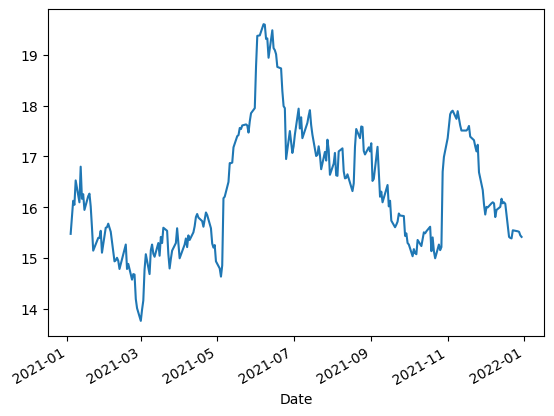

In [158]:
cotacoes_ibov_long_abev.value.plot();

In [159]:
cotacoes_ibov_long_abev

,variable_0,variable_1,value
Date,,,
2021-01-04,Close,ABEV3.SA,15.480000
2021-01-05,Close,ABEV3.SA,15.810000
2021-01-06,Close,ABEV3.SA,16.129999
2021-01-07,Close,ABEV3.SA,16.049999
2021-01-08,Close,ABEV3.SA,16.530001
...,...,...,...
2021-12-23,Close,ABEV3.SA,15.550000
2021-12-27,Close,ABEV3.SA,15.530000
2021-12-28,Close,ABEV3.SA,15.520000


#### Verificando e alterando o nome das colunas

In [160]:
cotacoes_ibov_long_abev.columns

Index(['variable_0', 'variable_1', 'value'], dtype='object')

In [161]:
cotacoes_ibov_long_abev.columns = ['Parametro', 'Ativo', 'Valor']
cotacoes_ibov_long_abev.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04 00:00:00,Close,ABEV3.SA,15.480000
2021-01-05 00:00:00,Close,ABEV3.SA,15.810000
2021-01-06 00:00:00,Close,ABEV3.SA,16.129999
2021-01-07 00:00:00,Close,ABEV3.SA,16.049999
2021-01-08 00:00:00,Close,ABEV3.SA,16.530001


#### Método 'pivot'

Vamos retornar ao formato padrão

Primeiramente vamos estudar o caso de multi index

In [162]:
cotacoes_ibov_long_abev_retorno = cotacoes_ibov_long_abev.pivot(columns = ['Parametro', 'Ativo'], values = 'Valor')
cotacoes_ibov_long_abev_retorno.head()

Parametro,Close
Ativo,ABEV3.SA
Date,
2021-01-04,15.480000
2021-01-05,15.810000
2021-01-06,16.129999
2021-01-07,16.049999
2021-01-08,16.530001


In [163]:
# Renomeando as colunas
cotacoes_ibov_long.columns = ['Parametro', 'Ativo', 'Valor']

# Realizando o pivot
retorno_ibov_ohlc = cotacoes_ibov_long.pivot(columns = ['Parametro', 'Ativo'])

retorno_ibov_ohlc

Valor                                                         \
Parametro   Adj Close                                                          
Ativo        ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-01-04  14.085717  41.191307  73.699677  64.887436        NaN  37.730000   
2021-01-05  14.385996  41.211086  72.052757  63.895031        NaN  38.200001   
2021-01-06  14.677172  38.966091  67.347267  60.116299        NaN  36.669998   
2021-01-07  14.604377  38.273800  65.984634  60.039959        NaN  36.049999   
2021-01-08  15.041145  40.251770  70.582291  61.165951        NaN  36.599998   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  14.771684  36.379086  30.124914  71.607521  13.893169  26.459999   
2021-12-27  14.752684  36.488602  31.271875  72.321968  13.449456  25.670000   
2021-12-28  14.743185  36.588161  30.419008  72.505394  12.917000  25.750000   
2021-12-29  14.676688  36.189922  30.409204  71.810265  12.660631  23.860001   
2021-12-30  14.648190  36.856972  30.958178  74.117691  12.778955  24.360001   

                                                        ...              \
Parametro                                               ...      Volume   
Ativo        B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...    TIMS3.SA   
Date                                                    ...               
2021-01-04  18.290253  30.328728  16.965784  19.124651  ...   3897800.0   
2021-01-05  18.326244  30.014076  16.884672  19.008043  ...   8506600.0   
2021-01-06  18.026302  30.699886  17.309120  19.638020  ...   9998400.0   
2021-01-07  18.530201  31.918198  17.733574  20.159391  ...  11072300.0   
2021-01-08  18.803146  32.103767  17.596888  19.985603  ...   5816400.0   
...               ...        ...        ...        ...  ...         ...   
2021-12-23  10.640840  25.399118  13.477399  16.014019  ...   2893300.0   
2021-12-27  10.575386  25.451275  13.618390  16.197132  ...   7282600.0   
2021-12-28  10.435129  25.303503  13.610096  16.138863  ...   3367300.0   
2021-12-29  10.360327  25.173115  13.510575  16.063959  ...   2589100.0   
2021-12-30  10.416430  25.077503  13.427637  15.989043  ...   7149400.0   

                                                                      \
Parametro                                                              
Ativo        TOTS3.SA   UGPA3.SA    USIM5.SA    VALE3.SA    VBBR3.SA   
Date                                                                   
2021-01-04  5429700.0  5472800.0  20687900.0  37865500.0   3953500.0   
2021-01-05  4430700.0  5428300.0  18302900.0  34300300.0  12993100.0   
2021-01-06  5512800.0  6564800.0  23592900.0  53722500.0  10884000.0   
2021-01-07  3322500.0  5638900.0  22298600.0  74541400.0   6954300.0   
2021-01-08  8427300.0  4449400.0  23237000.0  58562700.0   8434100.0   
...               ...        ...         ...         ...         ...   
2021-12-23  2731000.0  2238400.0  10681800.0  13121200.0   3932100.0   
2021-12-27  3040900.0  5340800.0  10504500.0  11371400.0   4196700.0   
2021-12-28  3269600.0  3777100.0  13201600.0  18923700.0   3743000.0   
2021-12-29  3205000.0  3591300.0  10525500.0  12113500.0   3630700.0   
2021-12-30  4400600.0  8871300.0  12815100.0  26568500.0  13547600.0   

                                                          
Parametro                                                 
Ativo         VIIA3.SA   VIVT3.SA    WEGE3.SA   YDUQ3.SA  
Date                                                      
2021-01-04  44372400.0  2791400.0   7219800.0  2640400.0  
2021-01-05  41436700.0  2899200.0  16633600.0  3703500.0  
2021-01-06  49797300.0  5790100.0  21507400.0  5004000.0  
2021-01-07  70842700.0  5213500.0  15129600.0  6138600.0  
2021-01-08  58505800.0  2916600.0  17381000.0  2685800.0  
...                ...        ...         ...        ...  
2021-12-23  306134

In [164]:
retorno_ibov_ohlc['Valor']

Parametro   Adj Close                                                         \
Ativo        ABEV3.SA   ALPA4.SA   AMER3.SA   ARZZ3.SA   ASAI3.SA   AZUL4.SA   
Date                                                                           
2021-01-04  14.085717  41.191307  73.699677  64.887436        NaN  37.730000   
2021-01-05  14.385996  41.211086  72.052757  63.895031        NaN  38.200001   
2021-01-06  14.677172  38.966091  67.347267  60.116299        NaN  36.669998   
2021-01-07  14.604377  38.273800  65.984634  60.039959        NaN  36.049999   
2021-01-08  15.041145  40.251770  70.582291  61.165951        NaN  36.599998   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  14.771684  36.379086  30.124914  71.607521  13.893169  26.459999   
2021-12-27  14.752684  36.488602  31.271875  72.321968  13.449456  25.670000   
2021-12-28  14.743185  36.588161  30.419008  72.505394  12.917000  25.750000   
2021-12-29  14.676688  36.189922  30.409204  71.810265  12.660631  23.860001   
2021-12-30  14.648190  36.856972  30.958178  74.117691  12.778955  24.360001   

Parametro                                               ...      Volume  \
Ativo        B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA  ...    TIMS3.SA   
Date                                                    ...               
2021-01-04  18.290253  30.328728  16.965784  19.124651  ...   3897800.0   
2021-01-05  18.326244  30.014076  16.884672  19.008043  ...   8506600.0   
2021-01-06  18.026302  30.699886  17.309120  19.638020  ...   9998400.0   
2021-01-07  18.530201  31.918198  17.733574  20.159391  ...  11072300.0   
2021-01-08  18.803146  32.103767  17.596888  19.985603  ...   5816400.0   
...               ...        ...        ...        ...  ...         ...   
2021-12-23  10.640840  25.399118  13.477399  16.014019  ...   2893300.0   
2021-12-27  10.575386  25.451275  13.618390  16.197132  ...   7282600.0   
2021-12-28  10.435129  25.303503  13.610096  16.138863  ...   3367300.0   
2021-12-29  10.360327  25.173115  13.510575  16.063959  ...   2589100.0   
2021-12-30  10.416430  25.077503  13.427637  15.989043  ...   7149400.0   

Parametro                                                             \
Ativo        TOTS3.SA   UGPA3.SA    USIM5.SA    VALE3.SA    VBBR3.SA   
Date                                                                   
2021-01-04  5429700.0  5472800.0  20687900.0  37865500.0   3953500.0   
2021-01-05  4430700.0  5428300.0  18302900.0  34300300.0  12993100.0   
2021-01-06  5512800.0  6564800.0  23592900.0  53722500.0  10884000.0   
2021-01-07  3322500.0  5638900.0  22298600.0  74541400.0   6954300.0   
2021-01-08  8427300.0  4449400.0  23237000.0  58562700.0   8434100.0   
...               ...        ...         ...         ...         ...   
2021-12-23  2731000.0  2238400.0  10681800.0  13121200.0   3932100.0   
2021-12-27  3040900.0  5340800.0  10504500.0  11371400.0   4196700.0   
2021-12-28  3269600.0  3777100.0  13201600.0  18923700.0   3743000.0   
2021-12-29  3205000.0  3591300.0  10525500.0  12113500.0   3630700.0   
2021-12-30  4400600.0  8871300.0  12815100.0  26568500.0  13547600.0   

Parametro                                                 
Ativo         VIIA3.SA   VIVT3.SA    WEGE3.SA   YDUQ3.SA  
Date                                                      
2021-01-04  44372400.0  2791400.0   7219800.0  2640400.0  
2021-01-05  41436700.0  2899200.0  16633600.0  3703500.0  
2021-01-06  49797300.0  5790100.0  21507400.0  5004000.0  
2021-01-07  70842700.0  5213500.0  15129600.0  6138600.0  
2021-01-08  58505800.0  2916600.0  17381000.0  2685800.0  
...                ...        ...         ...        ...  
2021-12-23  30613400.0  1382200.0   2166400.0  1731000.0  
2021-12-27  35550300.0  1492300.0   4457200.0  1809000.0  
2021-12-28  25433400.0  1060000.0   3670800.0  1710500.0  
2021-12-29  22334300.0   930200.0   3091700.0  1342300.0  
2021-12-30  58310400.0  2392600.0   4858300.0  20530

#### E caso tivéssemos um DF simples, single index?

In [165]:
cotacoes_ibov_abev = cotacoes_ibov_long[cotacoes_ibov_long['Ativo'] == 'ABEV3.SA']
cotacoes_ibov_abev.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04 00:00:00,Adj Close,ABEV3.SA,14.085717
2021-01-05 00:00:00,Adj Close,ABEV3.SA,14.385996
2021-01-06 00:00:00,Adj Close,ABEV3.SA,14.677172
2021-01-07 00:00:00,Adj Close,ABEV3.SA,14.604377
2021-01-08 00:00:00,Adj Close,ABEV3.SA,15.041145


In [166]:
cotacoes_ibov_abev.pivot(columns = 'Parametro', values = 'Valor')

Parametro,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2021-01-04,14.085717,15.480000,15.85,15.380000,15.790000,17835200.0
2021-01-05,14.385996,15.810000,16.02,15.230000,15.370000,37105800.0
2021-01-06,14.677172,16.129999,16.23,15.630000,15.660000,28371600.0
2021-01-07,14.604377,16.049999,16.24,15.910000,16.030001,32540100.0
2021-01-08,15.041145,16.530001,16.75,16.030001,16.100000,30188800.0
...,...,...,...,...,...,...
2021-12-23,14.771684,15.550000,15.67,15.340000,15.400000,10634700.0
2021-12-27,14.752684,15.530000,15.65,15.480000,15.550000,8437200.0
2021-12-28,14.743185,15.520000,15.57,15.400000,15.540000,7701300.0


## 2.9. Filtros mais complexos

#### **Filtros com mais de uma condição**

Vamos criar uma cópia do dataframe original para fazermos algumas práticas de filtros e substituições

In [167]:
df_cotacoes = cotacoes_ibov_long.copy()
df_cotacoes

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


In [168]:
df_cotacoes_adjclose = df_cotacoes[df_cotacoes['Parametro'] == 'Adj Close' ]
df_cotacoes_adjclose

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677172
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145
...,...,...,...
2021-12-23,Adj Close,YDUQ3.SA,19.930042
2021-12-27,Adj Close,YDUQ3.SA,19.675158
2021-12-28,Adj Close,YDUQ3.SA,20.449615


Além de filtrar a coluna "Parametro", agora queremos estabelecer um filtro também na coluna "Valor" queremos selecionar as linhas que possuem valor menor de 10

Por causa da presença do "&" (AND), as duas condições precisam ser respeitadas

In [169]:
df_cotacoes_lowcost = df_cotacoes[(df_cotacoes.Parametro == 'Adj Close') & \
                                  (df_cotacoes.Valor < 10 )]

In [170]:
# Lista dos ativos low cost
set(df_cotacoes_lowcost.Ativo)

{'BEEF3.SA',
 'BPAN4.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPLE6.SA',
 'ECOR3.SA',
 'EMBR3.SA',
 'GOAU4.SA',
 'ITSA4.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'POSI3.SA',
 'RAIZ4.SA',
 'TIMS3.SA',
 'VIIA3.SA'}

Cotações maiores que R\$ 8,00 e menores que R$ 10,00

In [171]:
df_cotacoes[(df_cotacoes.Parametro == 'Adj Close') & \
            (df_cotacoes.Valor < 10 ) & \
            (df_cotacoes.Valor > 8 )]

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,BEEF3.SA,8.185863
2021-01-05,Adj Close,BEEF3.SA,8.022799
2021-01-12,Adj Close,BEEF3.SA,8.145096
2021-01-14,Adj Close,BEEF3.SA,8.006493
2021-02-17,Adj Close,BEEF3.SA,8.210323
...,...,...,...
2021-10-06,Adj Close,VIIA3.SA,8.120000
2021-10-08,Adj Close,VIIA3.SA,8.060000
2021-10-13,Adj Close,VIIA3.SA,8.210000


In [172]:
set(df_cotacoes[(df_cotacoes.Parametro == 'Adj Close') & \
                 (df_cotacoes.Valor < 10 ) & \
                 (df_cotacoes.Valor > 8 )].Ativo)

{'BEEF3.SA',
 'BPAN4.SA',
 'CMIG4.SA',
 'ECOR3.SA',
 'EMBR3.SA',
 'GOAU4.SA',
 'ITSA4.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'POSI3.SA',
 'TIMS3.SA',
 'VIIA3.SA'}

#### **Filtros com mais de uma condição, incluindo "ou"**

Vamos complicar um pouco mais

Além do filtro acima, vamos criar um outro filtro onde a coluna Parametro precisa ser "Adj Close" e o Valor precisa ser menor que 10 OU maior que 80

In [173]:
df_cotacoes[(df_cotacoes.Parametro == "Adj Close") & \
            ((df_cotacoes.Valor < 10) | (df_cotacoes.Valor > 80))]

,Parametro,Ativo,Valor
Date,,,
2021-01-18,Adj Close,AMER3.SA,80.532433
2021-01-20,Adj Close,AMER3.SA,85.777092
2021-01-21,Adj Close,AMER3.SA,88.022003
2021-01-22,Adj Close,AMER3.SA,87.551445
2021-01-26,Adj Close,AMER3.SA,84.159576
...,...,...,...
2021-12-23,Adj Close,VIIA3.SA,4.500000
2021-12-27,Adj Close,VIIA3.SA,4.860000
2021-12-28,Adj Close,VIIA3.SA,4.950000


#### **Filtro com base em lista**

Vamos selecionar ativos com base em uma lista

Ou seja, precisamos filtrar as linhas de tal forma que contenham apenas os papéis que determinamos na lista

In [174]:
ativos_churrasco = ['ABEV3.SA','JBSS3.SA','CRFB3.SA','KLBN11.SA','RADL3.SA']

In [175]:
# Para filtro com listas utilizamos o método .isin()
df_cotacoes_churrasco = df_cotacoes[df_cotacoes.Ativo.isin(ativos_churrasco)]
df_cotacoes_churrasco.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04 00:00:00,Adj Close,ABEV3.SA,14.085717
2021-01-05 00:00:00,Adj Close,ABEV3.SA,14.385996
2021-01-06 00:00:00,Adj Close,ABEV3.SA,14.677172
2021-01-07 00:00:00,Adj Close,ABEV3.SA,14.604377
2021-01-08 00:00:00,Adj Close,ABEV3.SA,15.041145


Como selecionar todos os papéis que não estão na lista?

In [176]:
alguns_bancos = ['ITUB4.SA','BBDC4.SA','BBAS3.SA','SANB11.SA','BIDI11.SA']

# O ~ faz a negação da condição lógica
df_cotacoes_sembancos = df_cotacoes[~df_cotacoes.Ativo.isin(alguns_bancos)]
df_cotacoes_sembancos.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04 00:00:00,Adj Close,ABEV3.SA,14.085717
2021-01-05 00:00:00,Adj Close,ABEV3.SA,14.385996
2021-01-06 00:00:00,Adj Close,ABEV3.SA,14.677172
2021-01-07 00:00:00,Adj Close,ABEV3.SA,14.604377
2021-01-08 00:00:00,Adj Close,ABEV3.SA,15.041145


#### **Filtro com base em date range**

Utilizando o operador "date_range" para retornar todas as datas que estão presentes em um intervalo

In [177]:
ibov_date_range = pd.date_range(start='2021-03-21',end='2021-03-31')
ibov_date_range

DatetimeIndex(['2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
               '2021-03-29', '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', freq='D')

In [178]:
# Tipo do objeto gerado pela função pd.date_range
type(ibov_date_range)

pandas.core.indexes.datetimes.DatetimeIndex

In [179]:
# Antes vamos transformar o índice em datetime
df_cotacoes.index = pd.to_datetime(df_cotacoes.index)

In [180]:
df_cotacoes[df_cotacoes.index.isin(ibov_date_range)]

,Parametro,Ativo,Valor
Date,,,
2021-03-22,Adj Close,ABEV3.SA,1.420771e+01
2021-03-23,Adj Close,ABEV3.SA,1.378714e+01
2021-03-24,Adj Close,ABEV3.SA,1.353115e+01
2021-03-25,Adj Close,ABEV3.SA,1.370486e+01
2021-03-26,Adj Close,ABEV3.SA,1.385114e+01
...,...,...,...
2021-03-25,Volume,YDUQ3.SA,2.433000e+06
2021-03-26,Volume,YDUQ3.SA,1.801000e+06
2021-03-29,Volume,YDUQ3.SA,1.223600e+06


#### **Filtro com base em caractere da string**

Como podemos fazer para retornar apenas as ações ordinárias, ou seja, que têm final '3'?

In [181]:
df_cotacoes['Ativo']

Date
2021-01-04    ABEV3.SA
2021-01-05    ABEV3.SA
2021-01-06    ABEV3.SA
2021-01-07    ABEV3.SA
2021-01-08    ABEV3.SA
                ...   
2021-12-23    YDUQ3.SA
2021-12-27    YDUQ3.SA
2021-12-28    YDUQ3.SA
2021-12-29    YDUQ3.SA
2021-12-30    YDUQ3.SA
Name: Ativo, Length: 134862, dtype: object

In [182]:
df_cotacoes.Ativo.str[-4]

Date
2021-01-04    3
2021-01-05    3
2021-01-06    3
2021-01-07    3
2021-01-08    3
             ..
2021-12-23    3
2021-12-27    3
2021-12-28    3
2021-12-29    3
2021-12-30    3
Name: Ativo, Length: 134862, dtype: object

In [183]:
# Apenas os tickers que terminam com 3
df_cotacoes[df_cotacoes.Ativo.str[-4] == '3']

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


In [184]:
# Apenas os tickers que terminam com 4
df_cotacoes[df_cotacoes.Ativo.str[-4] == '4']

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ALPA4.SA,4.119131e+01
2021-01-05,Adj Close,ALPA4.SA,4.121109e+01
2021-01-06,Adj Close,ALPA4.SA,3.896609e+01
2021-01-07,Adj Close,ALPA4.SA,3.827380e+01
2021-01-08,Adj Close,ALPA4.SA,4.025177e+01
...,...,...,...
2021-12-23,Volume,RAIZ4.SA,3.174500e+06
2021-12-27,Volume,RAIZ4.SA,4.493500e+06
2021-12-28,Volume,RAIZ4.SA,4.379800e+06


In [185]:
# Lista com os ativos (sem duplicatas) utilizando o set
set(df_cotacoes[df_cotacoes.Ativo.str[-4] == '3'  ].Ativo)

{'ABEV3.SA',
 'AMER3.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BRFS3.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IRBR3.SA',
 'JBSS3.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SBSP3.SA',
 'SLCE3.SA',
 'SMTO3.SA',
 'SOMA3.SA',
 'SUZB3.SA',
 'TIMS3.SA',
 'TOTS3.SA',
 'UGPA3.SA',
 'VALE3.SA',
 'VBBR3.SA',
 'VIIA3.SA',
 'VIVT3.SA',
 'WEGE3.SA',
 'YDUQ3.SA'}

In [186]:
set(df_cotacoes[df_cotacoes.Ativo.str[-4] == '4'  ].Ativo)

{'ALPA4.SA',
 'AZUL4.SA',
 'BBDC4.SA',
 'BPAN4.SA',
 'BRAP4.SA',
 'CMIG4.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'PETR4.SA',
 'RAIZ4.SA'}

#### **Filtros .where e .mask**

Filtrando os dados com `.where`, ao invés de remover os valores que nao obedecem o filtro, as linha/coluna são substituídas por NaN ou pelo valor/str desejado

In [187]:
df_cotacoes.where(df_cotacoes.Ativo == 'ABEV3.SA')

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677172
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145
...,...,...,...
2021-12-23,NaN,NaN,NaN
2021-12-27,NaN,NaN,NaN
2021-12-28,NaN,NaN,NaN


In [188]:
df_cotacoes.where(df_cotacoes.Ativo == 'ABEV3.SA', 0)

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677172
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145
...,...,...,...
2021-12-23,0,0,0.000000
2021-12-27,0,0,0.000000
2021-12-28,0,0,0.000000


O método `mask` é usado para substituir os valores em um DataFrame ou uma Série com base em uma condição especificada.

Ele é semelhante ao método `where`, mas e**m vez de manter os valores que atendem à condição, o método mask substitui esses valores pelos valores especificados**.

Os valores que não atendem à condição ficam inalterados.

In [189]:
df_cotacoes.mask(df_cotacoes.Ativo == 'ABEV3.SA')

,Parametro,Ativo,Valor
Date,,,
2021-01-04,NaN,NaN,NaN
2021-01-05,NaN,NaN,NaN
2021-01-06,NaN,NaN,NaN
2021-01-07,NaN,NaN,NaN
2021-01-08,NaN,NaN,NaN
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1731000.0
2021-12-27,Volume,YDUQ3.SA,1809000.0
2021-12-28,Volume,YDUQ3.SA,1710500.0


In [190]:
df_cotacoes.mask(df_cotacoes.Ativo == 'ABEV3.SA', "Zero")

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Zero,Zero,Zero
2021-01-05,Zero,Zero,Zero
2021-01-06,Zero,Zero,Zero
2021-01-07,Zero,Zero,Zero
2021-01-08,Zero,Zero,Zero
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1731000.0
2021-12-27,Volume,YDUQ3.SA,1809000.0
2021-12-28,Volume,YDUQ3.SA,1710500.0


## 2.10. Ordenação

Existem métodos diretos para ordenar/classificar índices e colunas

In [191]:
df_cotacoes.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677172
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145


In [192]:
# Ordenação pelo índice
df_cotacoes.sort_index()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-04,Adj Close,CRFB3.SA,1.780400e+01
2021-01-04,Low,ARZZ3.SA,6.698000e+01
2021-01-04,Low,AMER3.SA,7.385000e+01
2021-01-04,Volume,CCRO3.SA,8.016400e+06
...,...,...,...
2021-12-30,Open,ASAI3.SA,1.290000e+01
2021-12-30,Open,AZUL4.SA,2.410000e+01
2021-12-30,Open,B3SA3.SA,1.115000e+01


In [193]:
# Ordenação decrescente pelo índice
df_cotacoes.sort_index(ascending = False)

,Parametro,Ativo,Valor
Date,,,
2021-12-30,Volume,YDUQ3.SA,2.053000e+06
2021-12-30,Open,COGN3.SA,2.400000e+00
2021-12-30,Open,CMIG4.SA,1.004615e+01
2021-12-30,Adj Close,PRIO3.SA,2.067000e+01
2021-12-30,Open,CIEL3.SA,2.170000e+00
...,...,...,...
2021-01-04,Open,ASAI3.SA,NaN
2021-01-04,Open,AZUL4.SA,4.000000e+01
2021-01-04,Open,B3SA3.SA,2.071333e+01


In [194]:
# Baseando-se em uma ou mais colunas
df_cotacoes.sort_values('Valor', ascending = False)

,Parametro,Ativo,Valor
Date,,,
2021-02-22,Volume,PETR4.SA,490230400.0
2021-02-23,Volume,PETR4.SA,293503100.0
2021-12-09,Volume,MGLU3.SA,257831300.0
2021-12-08,Volume,MGLU3.SA,255628900.0
2021-12-13,Volume,MGLU3.SA,255551000.0
...,...,...,...
2021-07-29,Volume,RAIZ4.SA,NaN
2021-07-30,Volume,RAIZ4.SA,NaN
2021-08-02,Volume,RAIZ4.SA,NaN


In [195]:
df_cotacoes.sort_values('Ativo', ascending = True)

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-05-11,Volume,ABEV3.SA,2.571930e+07
2021-05-10,Volume,ABEV3.SA,2.935500e+07
2021-05-07,Volume,ABEV3.SA,2.227910e+07
2021-05-06,Volume,ABEV3.SA,7.331120e+07
...,...,...,...
2021-05-07,Low,YDUQ3.SA,2.819000e+01
2021-05-10,Low,YDUQ3.SA,2.843000e+01
2021-05-11,Low,YDUQ3.SA,2.775000e+01


In [196]:
df_cotacoes.sort_values(['Parametro', 'Ativo'], ascending = True)

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.408572e+01
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01
2021-01-06,Adj Close,ABEV3.SA,1.467717e+01
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


Em alguns casos, desejamos listar os maiores ou menores valores


Por exemplo o top 10 volumes negociados.

In [197]:
# Filtrando o df apenas com os valores de Volume
df_volumes = df_cotacoes[df_cotacoes.Parametro == 'Volume']

# Exibindo os 10 maiores valores com o método .nlargest(10)
df_volumes.nlargest(10, 'Valor')

,Parametro,Ativo,Valor
Date,,,
2021-02-22,Volume,PETR4.SA,490230400.0
2021-02-23,Volume,PETR4.SA,293503100.0
2021-12-09,Volume,MGLU3.SA,257831300.0
2021-12-08,Volume,MGLU3.SA,255628900.0
2021-12-13,Volume,MGLU3.SA,255551000.0
2021-02-26,Volume,PCAR3.SA,232567365.0
2021-08-05,Volume,PETR4.SA,223915900.0
2021-02-19,Volume,PETR4.SA,215834800.0
2021-12-10,Volume,MGLU3.SA,209180700.0


Ou os 5 menores preços de fechamento registrados

In [199]:
df_close = df_cotacoes[df_cotacoes.Parametro == 'Close']

df_close.nsmallest(5, 'Valor')

,Parametro,Ativo,Valor
Date,,,
2021-12-01,Close,CIEL3.SA,2.01
2021-11-29,Close,CIEL3.SA,2.07
2021-11-30,Close,CIEL3.SA,2.07
2021-11-26,Close,CIEL3.SA,2.08
2021-12-22,Close,CIEL3.SA,2.11


## 2.11. Strings em dataframes

### 2.11.1. Substituição com regex

Imagine que eu quero remover o "SA" do nome dos ativos

In [200]:
df_cotacoes_copy = df_cotacoes.copy()
df_cotacoes_copy.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677172
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145


Nesse caso em especial não teríamos muitos problemas porque o SA está precedido pelo "."

Bastaria usar o replace ".SA"

In [202]:
df_cotacoes_copy['Ativo']= df_cotacoes_copy.Ativo.str.replace("SA", "")
df_cotacoes_copy.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.,14.085717
2021-01-05,Adj Close,ABEV3.,14.385996
2021-01-06,Adj Close,ABEV3.,14.677172
2021-01-07,Adj Close,ABEV3.,14.604377
2021-01-08,Adj Close,ABEV3.,15.041145


Parece resolvido, mas e se pensarmos em ativos como Banco do Brasil ('BBSA3'), Assaí ('ASAI3'), Itaúsa ('ITSA3')?

In [203]:
set(df_cotacoes_copy.Ativo)

{'ABEV3.',
 'AI3.',
 'ALPA4.',
 'AMER3.',
 'ARZZ3.',
 'AZUL4.',
 'B33.',
 'BBAS3.',
 'BBDC3.',
 'BBDC4.',
 'BBSE3.',
 'BEEF3.',
 'BPAC11.',
 'BPAN4.',
 'BRAP4.',
 'BRFS3.',
 'BRKM5.',
 'BRML3.',
 'CASH3.',
 'CCRO3.',
 'CIEL3.',
 'CMIG4.',
 'CMIN3.',
 'CN3.',
 'COGN3.',
 'CPFE3.',
 'CPLE6.',
 'CRFB3.',
 'CSNA3.',
 'CVCB3.',
 'CYRE3.',
 'DXCO3.',
 'ECOR3.',
 'EGIE3.',
 'ELET3.',
 'ELET6.',
 'EMBR3.',
 'ENBR3.',
 'ENEV3.',
 'ENGI11.',
 'EQTL3.',
 'EZTC3.',
 'FLRY3.',
 'GGBR4.',
 'GOAU4.',
 'GOLL4.',
 'HAPV3.',
 'HYPE3.',
 'IGTI11.',
 'IRBR3.',
 'IT4.',
 'ITUB4.',
 'JBSS3.',
 'KLBN11.',
 'LREN3.',
 'LW3.',
 'MGLU3.',
 'MRFG3.',
 'MRVE3.',
 'MULT3.',
 'NB11.',
 'NTCO3.',
 'PCAR3.',
 'PETR3.',
 'PETR4.',
 'PETZ3.',
 'POSI3.',
 'PRIO3.',
 'QUAL3.',
 'RADL3.',
 'RAIL3.',
 'RAIZ4.',
 'RDOR3.',
 'RENT3.',
 'RRRP3.',
 'SBSP3.',
 'SLCE3.',
 'SMTO3.',
 'SOMA3.',
 'SUZB3.',
 'TAEE11.',
 'TIMS3.',
 'TOTS3.',
 'UGPA3.',
 'USIM5.',
 'VALE3.',
 'VBBR3.',
 'VIIA3.',
 'VIVT3.',
 'WEGE3.',
 'YDUQ3.'}

Por isso, temos técnicas de susbtituição e localização mais eficientes usando as expressões regulares (regex)

In [205]:
# Para remover os ".SA" dos tickers, precisamos usar um método chamado "replace"
# Precisamos indicar o que queremos remover e o que virá no lugar
# r'.SA$' nos indica qualquer palavra terminada em .SA


df_cotacoes_copy['Ativo']= df_cotacoes_copy.Ativo.str.replace('.SA$', "", regex = True)
df_cotacoes_copy.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.,14.085717
2021-01-05,Adj Close,ABEV3.,14.385996
2021-01-06,Adj Close,ABEV3.,14.677172
2021-01-07,Adj Close,ABEV3.,14.604377
2021-01-08,Adj Close,ABEV3.,15.041145


In [206]:
df_cotacoes_copy['Ativo']= df_cotacoes_copy.Ativo.replace(to_replace = r'.SA$', value = "", regex = True)

In [207]:
df_cotacoes_copy.replace(to_replace = r'^.SA', value = "", regex = True)

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.,1.408572e+01
2021-01-05,Adj Close,ABEV3.,1.438600e+01
2021-01-06,Adj Close,ABEV3.,1.467717e+01
2021-01-07,Adj Close,ABEV3.,1.460438e+01
2021-01-08,Adj Close,ABEV3.,1.504115e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.,1.731000e+06
2021-12-27,Volume,YDUQ3.,1.809000e+06
2021-12-28,Volume,YDUQ3.,1.710500e+06


### 2.11.2. Concatenar e dividir

#### Concatenação

In [208]:
df_cotacoes.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717
2021-01-05,Adj Close,ABEV3.SA,14.385996
2021-01-06,Adj Close,ABEV3.SA,14.677172
2021-01-07,Adj Close,ABEV3.SA,14.604377
2021-01-08,Adj Close,ABEV3.SA,15.041145


Concatenar strings e indicar um separador desejado.

Para isso utilizamos o método `.str.cat` em um Pandas Series para concatenar elementos de uma série de strings em uma única string, separados por um delimitador específicado.

In [210]:
df_cotacoes['Ativo_Parametro'] = df_cotacoes.Ativo.str.cat(df_cotacoes.Parametro, sep = '_')
df_cotacoes.head()

,Parametro,Ativo,Valor,Ativo_Parametro
Date,,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717,ABEV3.SA_Adj Close
2021-01-05,Adj Close,ABEV3.SA,14.385996,ABEV3.SA_Adj Close
2021-01-06,Adj Close,ABEV3.SA,14.677172,ABEV3.SA_Adj Close
2021-01-07,Adj Close,ABEV3.SA,14.604377,ABEV3.SA_Adj Close
2021-01-08,Adj Close,ABEV3.SA,15.041145,ABEV3.SA_Adj Close


#### Divisão de strings

In [211]:
df_cotacoes.head()

,Parametro,Ativo,Valor,Ativo_Parametro
Date,,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717,ABEV3.SA_Adj Close
2021-01-05,Adj Close,ABEV3.SA,14.385996,ABEV3.SA_Adj Close
2021-01-06,Adj Close,ABEV3.SA,14.677172,ABEV3.SA_Adj Close
2021-01-07,Adj Close,ABEV3.SA,14.604377,ABEV3.SA_Adj Close
2021-01-08,Adj Close,ABEV3.SA,15.041145,ABEV3.SA_Adj Close




Dividir strings e indicar output como listas ou colunas do próprio df.

Para isso usamos o método `.str.split` que quebra uma string única em várias partes com base no caractere delimitador e cria listas contendo os substrings.

In [212]:
df_cotacoes.Ativo_Parametro.str.split('_')

Date
2021-01-04    [ABEV3.SA, Adj Close]
2021-01-05    [ABEV3.SA, Adj Close]
2021-01-06    [ABEV3.SA, Adj Close]
2021-01-07    [ABEV3.SA, Adj Close]
2021-01-08    [ABEV3.SA, Adj Close]
                      ...          
2021-12-23       [YDUQ3.SA, Volume]
2021-12-27       [YDUQ3.SA, Volume]
2021-12-28       [YDUQ3.SA, Volume]
2021-12-29       [YDUQ3.SA, Volume]
2021-12-30       [YDUQ3.SA, Volume]
Name: Ativo_Parametro, Length: 134862, dtype: object

In [213]:
df_cotacoes['Colunas_divididas'] = df_cotacoes.Ativo_Parametro.str.split('_')
df_cotacoes.head()

,Parametro,Ativo,Valor,Ativo_Parametro,Colunas_divididas
Date,,,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"
2021-01-05,Adj Close,ABEV3.SA,14.385996,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"
2021-01-06,Adj Close,ABEV3.SA,14.677172,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"
2021-01-07,Adj Close,ABEV3.SA,14.604377,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"
2021-01-08,Adj Close,ABEV3.SA,15.041145,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]"


In [214]:
# Para criar duas ou mais colunas por meio de listas, passamos o parâmetro expand=True no método str.split
df_cotacoes[['Ativo2', 'Parametro2']] = df_cotacoes.Ativo_Parametro.str.split('_', expand = True)
df_cotacoes.head()

,Parametro,Ativo,Valor,Ativo_Parametro,Colunas_divididas,Ativo2,Parametro2
Date,,,,,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close
2021-01-05,Adj Close,ABEV3.SA,14.385996,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close
2021-01-06,Adj Close,ABEV3.SA,14.677172,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close
2021-01-07,Adj Close,ABEV3.SA,14.604377,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close
2021-01-08,Adj Close,ABEV3.SA,15.041145,ABEV3.SA_Adj Close,"[ABEV3.SA, Adj Close]",ABEV3.SA,Adj Close


## 2.12. Duplicatas

#### Análise de duplicatas

In [218]:
# Removendo as colunas criadas anteriormente
df_cotacoes.drop(columns=["Colunas_divididas", "Ativo2", "Parametro2"], inplace=True)
df_cotacoes.head()

,Parametro,Ativo,Valor,Ativo_Parametro
Date,,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717,ABEV3.SA_Adj Close
2021-01-05,Adj Close,ABEV3.SA,14.385996,ABEV3.SA_Adj Close
2021-01-06,Adj Close,ABEV3.SA,14.677172,ABEV3.SA_Adj Close
2021-01-07,Adj Close,ABEV3.SA,14.604377,ABEV3.SA_Adj Close
2021-01-08,Adj Close,ABEV3.SA,15.041145,ABEV3.SA_Adj Close


In [219]:
# Método .any indica se existe ALGUMA linha duplicada
df_cotacoes.duplicated().any()

True

In [220]:
# Método .sum conta quantas duplicatas aparecem
df_cotacoes.duplicated().sum()

20643

In [221]:
# Podemos utilizar o método .any em colunas separadas
print(df_cotacoes['Parametro'].duplicated().any(),
df_cotacoes['Ativo'].duplicated().any(),
df_cotacoes['Valor'].duplicated().any())

True True True


In [223]:
# Verificar onde estão as duplicatas
# Por padrão o parâmetro keep é "first" que trás apenas a primeira linha dos registros duplicados
# Passando o parametro keep=False trará todas as linhas (as linhas repetidas)
df_cotacoes[df_cotacoes.duplicated(keep=False )].tail()

,Parametro,Ativo,Valor,Ativo_Parametro
Date,,,,
2021-08-03,Volume,UGPA3.SA,5213500.0,UGPA3.SA_Volume
2021-01-13,Volume,VIVT3.SA,2977700.0,VIVT3.SA_Volume
2021-10-01,Volume,VIVT3.SA,2977700.0,VIVT3.SA_Volume
2021-06-23,Volume,YDUQ3.SA,3250900.0,YDUQ3.SA_Volume
2021-09-01,Volume,YDUQ3.SA,3250900.0,YDUQ3.SA_Volume


#### Remoção de duplicatas

Caso quiséssemos manter apenas o primeiro valor de cada parametro e ativo

In [224]:
sem_duplicatas_first = df_cotacoes.drop_duplicates(subset = ['Parametro', 'Ativo'], keep = 'first')
sem_duplicatas_first.head()

,Parametro,Ativo,Valor,Ativo_Parametro
Date,,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717,ABEV3.SA_Adj Close
2021-01-04,Adj Close,ALPA4.SA,41.191307,ALPA4.SA_Adj Close
2021-01-04,Adj Close,AMER3.SA,73.699677,AMER3.SA_Adj Close
2021-01-04,Adj Close,ARZZ3.SA,64.887436,ARZZ3.SA_Adj Close
2021-01-04,Adj Close,ASAI3.SA,NaN,ASAI3.SA_Adj Close


Outra forma de remover duplicatas é usando o .unique Nesse caso, ele retorna um array e não um filtro de duplicatas do df.

Funcionamento parecido ao set

In [225]:
df_cotacoes.Ativo.unique()

array(['ABEV3.SA', 'ALPA4.SA', 'AMER3.SA', 'ARZZ3.SA', 'ASAI3.SA',
       'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA',
       'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA', 'BPAN4.SA', 'BRAP4.SA',
       'BRFS3.SA', 'BRKM5.SA', 'BRML3.SA', 'CASH3.SA', 'CCRO3.SA',
       'CIEL3.SA', 'CMIG4.SA', 'CMIN3.SA', 'COGN3.SA', 'CPFE3.SA',
       'CPLE6.SA', 'CRFB3.SA', 'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA',
       'CYRE3.SA', 'DXCO3.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA',
       'ELET6.SA', 'EMBR3.SA', 'ENBR3.SA', 'ENEV3.SA', 'ENGI11.SA',
       'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GOAU4.SA',
       'GOLL4.SA', 'HAPV3.SA', 'HYPE3.SA', 'IGTI11.SA', 'IRBR3.SA',
       'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'KLBN11.SA', 'LREN3.SA',
       'LWSA3.SA', 'MGLU3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA',
       'NTCO3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'PETZ3.SA',
       'POSI3.SA', 'PRIO3.SA', 'QUAL3.SA', 'RADL3.SA', 'RAIL3.SA',
       'RAIZ4.SA', 'RDOR3.SA', 'RENT3.SA', 'RRRP3.SA', 'SA

## 2.13. Drop

In [226]:
df_cotacoes.head()

,Parametro,Ativo,Valor,Ativo_Parametro
Date,,,,
2021-01-04,Adj Close,ABEV3.SA,14.085717,ABEV3.SA_Adj Close
2021-01-05,Adj Close,ABEV3.SA,14.385996,ABEV3.SA_Adj Close
2021-01-06,Adj Close,ABEV3.SA,14.677172,ABEV3.SA_Adj Close
2021-01-07,Adj Close,ABEV3.SA,14.604377,ABEV3.SA_Adj Close
2021-01-08,Adj Close,ABEV3.SA,15.041145,ABEV3.SA_Adj Close


Embora já tenhamos utilizado antes, vamos explorar o drop um pouco mais.

Trata-se da função que deve ser utilizada quando precisamos remover linhas ou colunas

In [227]:
df_cotacoes.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=134862, freq=None)

In [228]:
# Suponha que queremos remover três datas:

data01 = '2021-01-04'
data02 = '2021-01-06'
data03 = '2021-01-12'

In [229]:
df_cotacoes.drop([data01, data02, data03])

,Parametro,Ativo,Valor,Ativo_Parametro
Date,,,,
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01,ABEV3.SA_Adj Close
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01,ABEV3.SA_Adj Close
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01,ABEV3.SA_Adj Close
2021-01-11,Adj Close,ABEV3.SA,1.464987e+01,ABEV3.SA_Adj Close
2021-01-13,Adj Close,ABEV3.SA,1.471357e+01,ABEV3.SA_Adj Close
...,...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06,YDUQ3.SA_Volume
2021-12-27,Volume,YDUQ3.SA,1.809000e+06,YDUQ3.SA_Volume
2021-12-28,Volume,YDUQ3.SA,1.710500e+06,YDUQ3.SA_Volume


Mesmo passando os valores da data como string o pandas entendeu e conseguiu remover.

Porém o mais correto seria transformar as strings em data antes da exclusão (já que o nosso índice é do tipo data)

In [230]:
df_cotacoes.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=134862, freq=None)

In [231]:
data01 = pd.to_datetime('2021-01-04')
data02 = pd.to_datetime('2021-01-06')
data03 = pd.to_datetime('2021-01-12')

df_cotacoes.drop([data01, data02, data03])

,Parametro,Ativo,Valor,Ativo_Parametro
Date,,,,
2021-01-05,Adj Close,ABEV3.SA,1.438600e+01,ABEV3.SA_Adj Close
2021-01-07,Adj Close,ABEV3.SA,1.460438e+01,ABEV3.SA_Adj Close
2021-01-08,Adj Close,ABEV3.SA,1.504115e+01,ABEV3.SA_Adj Close
2021-01-11,Adj Close,ABEV3.SA,1.464987e+01,ABEV3.SA_Adj Close
2021-01-13,Adj Close,ABEV3.SA,1.471357e+01,ABEV3.SA_Adj Close
...,...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06,YDUQ3.SA_Volume
2021-12-27,Volume,YDUQ3.SA,1.809000e+06,YDUQ3.SA_Volume
2021-12-28,Volume,YDUQ3.SA,1.710500e+06,YDUQ3.SA_Volume


Com o método drop também podemos remover colunas passando o seu nome:

In [232]:
df_cotacoes.drop(['Valor'], axis = 1).head()

,Parametro,Ativo,Ativo_Parametro
Date,,,
2021-01-04,Adj Close,ABEV3.SA,ABEV3.SA_Adj Close
2021-01-05,Adj Close,ABEV3.SA,ABEV3.SA_Adj Close
2021-01-06,Adj Close,ABEV3.SA,ABEV3.SA_Adj Close
2021-01-07,Adj Close,ABEV3.SA,ABEV3.SA_Adj Close
2021-01-08,Adj Close,ABEV3.SA,ABEV3.SA_Adj Close


E também remover pelo índice

In [233]:
df_cotacoes.columns[[0,2]]

Index(['Parametro', 'Valor'], dtype='object')

In [234]:
df_cotacoes.drop(df_cotacoes.columns[[0,2]], axis = 1)

,Ativo,Ativo_Parametro
Date,,
2021-01-04,ABEV3.SA,ABEV3.SA_Adj Close
2021-01-05,ABEV3.SA,ABEV3.SA_Adj Close
2021-01-06,ABEV3.SA,ABEV3.SA_Adj Close
2021-01-07,ABEV3.SA,ABEV3.SA_Adj Close
2021-01-08,ABEV3.SA,ABEV3.SA_Adj Close
...,...,...
2021-12-23,YDUQ3.SA,YDUQ3.SA_Volume
2021-12-27,YDUQ3.SA,YDUQ3.SA_Volume
2021-12-28,YDUQ3.SA,YDUQ3.SA_Volume


Lembrando que todas essas alterações feitas com o `drop` não foram de fato concretizadas pois não passamos o parâmetro `inplace=True`.

## 2.14. Distribuição de dados em grupos

In [235]:
# Vamos trabalhar com os dados da petrobras
petr = pd.read_csv('PETR4.csv', index_col = 'Date')
petr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-04,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-05,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


Filtrar apenas o ano de 2021

In [236]:
# Criando um range de datas do ano de 2021
datas = pd.date_range(start = '2021-01-01', end = '2021-12-31')

petr[petr.index.isin(datas)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


Não funcionou pois o nosso índice não está no formato `datetime`.

Precisamos primeiro converter o índice para o formato correto.

In [237]:
petr.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-12',
       '2022-12-13', '2022-12-14', '2022-12-15', '2022-12-16', '2022-12-19'],
      dtype='object', name='Date', length=5770)

In [238]:
# Convertendo o index
petr.index = pd.to_datetime(petr.index)

# Realizando o filtro
petr = petr[petr.index.isin(datas)]

# Vizualisando o resultado
petr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,28.650000,29.18,28.530001,28.910000,13.732214,74719700
2021-01-05,28.900000,30.18,28.240000,30.040001,14.268962,95181100
2021-01-06,30.160000,30.90,30.049999,30.100000,14.297462,96562500
2021-01-07,30.340000,31.15,30.340000,31.000000,14.724960,56171300
2021-01-08,31.459999,31.76,30.350000,31.120001,14.781961,67136300


Vamos criar uma nova coluna que determina o resultado do pregão

In [239]:
petr['Resultado%'] = (petr['Close'] - petr['Open'])/petr['Open']*100

petr.head()

,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,
2021-01-04,28.650000,29.18,28.530001,28.910000,13.732214,74719700,0.907505
2021-01-05,28.900000,30.18,28.240000,30.040001,14.268962,95181100,3.944641
2021-01-06,30.160000,30.90,30.049999,30.100000,14.297462,96562500,-0.198937
2021-01-07,30.340000,31.15,30.340000,31.000000,14.724960,56171300,2.175346
2021-01-08,31.459999,31.76,30.350000,31.120001,14.781961,67136300,-1.080732


Agora poderiamos dividí-los em positivo x negativo.

Vamos utilizar a função `.where`

In [240]:
petr['Resultado_binario'] = np.where(petr['Resultado%'] > 0, 'Positivo', 'Negativo')

petr.head()

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario
Date,,,,,,,,
2021-01-04,28.650000,29.18,28.530001,28.910000,13.732214,74719700,0.907505,Positivo
2021-01-05,28.900000,30.18,28.240000,30.040001,14.268962,95181100,3.944641,Positivo
2021-01-06,30.160000,30.90,30.049999,30.100000,14.297462,96562500,-0.198937,Negativo
2021-01-07,30.340000,31.15,30.340000,31.000000,14.724960,56171300,2.175346,Positivo
2021-01-08,31.459999,31.76,30.350000,31.120001,14.781961,67136300,-1.080732,Negativo


Vamos contar quantos dias tivemos resultados positivos ou negativos

In [241]:
len(petr[petr['Resultado_binario'] == 'Positivo'])

119

In [242]:
len(petr[petr['Resultado_binario'] == 'Negativo'])

128

Veja que tivemos mais dias negativos que positivos.

E se quisessemos encontrar um jeito de dividir os dados em dois grupos de mesmo tamanho?

In [243]:
# Função cut, divide os dados na quantidade de bins passados, criando ranges dos valores
pd.cut(petr['Resultado%'], bins=2)

Date
2021-01-04     (-0.722, 5.795]
2021-01-05     (-0.722, 5.795]
2021-01-06     (-0.722, 5.795]
2021-01-07     (-0.722, 5.795]
2021-01-08    (-7.253, -0.722]
                    ...       
2021-12-23     (-0.722, 5.795]
2021-12-27     (-0.722, 5.795]
2021-12-28    (-7.253, -0.722]
2021-12-29     (-0.722, 5.795]
2021-12-30     (-0.722, 5.795]
Name: Resultado%, Length: 247, dtype: category
Categories (2, interval[float64, right]): [(-7.253, -0.722] < (-0.722, 5.795]]

In [244]:
# Atribuindo os grupos em uma nova coluna
petr['Grupos_mesmo_tamanho'] = pd.cut(petr['Resultado%'], 2)
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho
Date,,,,,,,,,
2021-01-04,28.650000,29.18,28.530001,28.910000,13.732214,74719700,0.907505,Positivo,"(-0.722, 5.795]"
2021-01-05,28.900000,30.18,28.240000,30.040001,14.268962,95181100,3.944641,Positivo,"(-0.722, 5.795]"
2021-01-06,30.160000,30.90,30.049999,30.100000,14.297462,96562500,-0.198937,Negativo,"(-0.722, 5.795]"
2021-01-07,30.340000,31.15,30.340000,31.000000,14.724960,56171300,2.175346,Positivo,"(-0.722, 5.795]"
2021-01-08,31.459999,31.76,30.350000,31.120001,14.781961,67136300,-1.080732,Negativo,"(-7.253, -0.722]"


É possível também nomear as classes/categorias, basta passar o parâmetro labels que recebe uma lista com o nome das categorias criadas.

In [245]:
petr['Grupos_mesmo_tamanho'] = pd.cut(petr['Resultado%'], 2, labels = ['piores_dias', 'melhores_dias'])
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho
Date,,,,,,,,,
2021-01-04,28.650000,29.18,28.530001,28.910000,13.732214,74719700,0.907505,Positivo,melhores_dias
2021-01-05,28.900000,30.18,28.240000,30.040001,14.268962,95181100,3.944641,Positivo,melhores_dias
2021-01-06,30.160000,30.90,30.049999,30.100000,14.297462,96562500,-0.198937,Negativo,melhores_dias
2021-01-07,30.340000,31.15,30.340000,31.000000,14.724960,56171300,2.175346,Positivo,melhores_dias
2021-01-08,31.459999,31.76,30.350000,31.120001,14.781961,67136300,-1.080732,Negativo,piores_dias


Podemos também determinar os intervalos manualmente

In [246]:
# Criamos os intervalos como uma lista de tuplas
lista_intervalos = [(-50, -2), (-2, -1), (-1, 1), (1, 2), (2, 50)]

# precisamos criar um IntervalIndex com a função de mesmo nome do pandas, passando uma lista de tuplas
bins = pd.IntervalIndex.from_tuples(lista_intervalos)

petr['Grupos_pre_definidos'] = pd.cut(petr['Resultado%'], bins=bins)

petr.head()

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho,Grupos_pre_definidos
Date,,,,,,,,,,
2021-01-04,28.650000,29.18,28.530001,28.910000,13.732214,74719700,0.907505,Positivo,melhores_dias,"(-1, 1]"
2021-01-05,28.900000,30.18,28.240000,30.040001,14.268962,95181100,3.944641,Positivo,melhores_dias,"(2, 50]"
2021-01-06,30.160000,30.90,30.049999,30.100000,14.297462,96562500,-0.198937,Negativo,melhores_dias,"(-1, 1]"
2021-01-07,30.340000,31.15,30.340000,31.000000,14.724960,56171300,2.175346,Positivo,melhores_dias,"(2, 50]"
2021-01-08,31.459999,31.76,30.350000,31.120001,14.781961,67136300,-1.080732,Negativo,piores_dias,"(-2, -1]"


In [247]:
# Agora podemos utilizar a função value_counts para contar a ocorrência de cada um dos intervalos
petr.Grupos_pre_definidos.value_counts()

(-1, 1]      117
(1, 2]        35
(-50, -2]     34
(-2, -1]      31
(2, 50]       30
Name: Grupos_pre_definidos, dtype: int64

A função `between` é usada para criar uma máscara booleana que indica se os valores de uma série ou DataFrame estão dentro de um intervalo específico. É útil para realizar filtragens condicionais com base em valores que atendem a critérios específicos de intervalo.

In [248]:
petr[petr['Resultado%'].between(-1,1)]

,Open,High,Low,Close,Adj Close,Volume,Resultado%,Resultado_binario,Grupos_mesmo_tamanho,Grupos_pre_definidos
Date,,,,,,,,,,
2021-01-04,28.650000,29.180000,28.530001,28.910000,13.732214,74719700,0.907505,Positivo,melhores_dias,"(-1, 1]"
2021-01-06,30.160000,30.900000,30.049999,30.100000,14.297462,96562500,-0.198937,Negativo,melhores_dias,"(-1, 1]"
2021-01-11,30.610001,31.059999,30.400000,30.860001,14.658461,48744700,0.816727,Positivo,melhores_dias,"(-1, 1]"
2021-01-14,29.170000,29.670000,28.719999,29.450001,13.988713,50745400,0.959893,Positivo,melhores_dias,"(-1, 1]"
2021-01-18,28.309999,28.850000,28.010000,28.070000,13.333213,68855700,-0.847756,Negativo,piores_dias,"(-1, 1]"
...,...,...,...,...,...,...,...,...,...,...
2021-12-22,28.400000,28.400000,27.969999,28.160000,16.456808,33734500,-0.845070,Negativo,piores_dias,"(-1, 1]"
2021-12-23,28.330000,28.420000,28.150000,28.330000,16.556158,28713600,0.000000,Negativo,melhores_dias,"(-1, 1]"
2021-12-28,29.010000,29.280001,28.700001,28.780001,16.819141,30688100,-0.792828,Negativo,piores_dias,"(-1, 1]"


## 2.15. Formatação de dataframes e modificação do estilo

In [254]:
# Reiniciando o dataframe
petr = pd.read_csv('PETR4.csv', index_col='Date')
petr.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-04,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-05,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


In [255]:
# Transformando o índice em datetime
petr.index = pd.to_datetime(petr.index)

In [257]:
# Filtrando apenas dados do mês de dezembro de 2022
petr = petr[petr.index >= '2022-12']
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-01,26.580000,26.790001,25.559999,25.590000,25.590000,71259400
2022-12-02,25.690001,26.450001,25.309999,25.910000,25.910000,66301000
2022-12-05,26.000000,26.580000,25.549999,25.620001,25.620001,56065400
2022-12-06,25.820000,26.389999,25.420000,25.639999,25.639999,74991200
2022-12-07,25.340000,26.070000,25.270000,25.350000,25.350000,57008400
2022-12-08,25.549999,25.790001,24.639999,24.780001,24.780001,55567700
2022-12-09,24.990000,25.049999,24.490000,24.709999,24.709999,61586200
2022-12-12,24.580000,24.660000,23.129999,23.910000,23.910000,111293100
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100


In [265]:
# Calculando a coluna Resultado do pregão
petr['Resultado%'] = (petr['Close'] - petr['Open']) / petr['Open']  * 100
petr.head()

<ipython-input-265-45fdb4bda49b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petr['Resultado%'] = (petr['Close'] - petr['Open']) / petr['Open']  * 100


,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,
2022-12-01,26.580000,26.790001,25.559999,25.590000,25.590000,71259400,-3.724604
2022-12-02,25.690001,26.450001,25.309999,25.910000,25.910000,66301000,0.856362
2022-12-05,26.000000,26.580000,25.549999,25.620001,25.620001,56065400,-1.461535
2022-12-06,25.820000,26.389999,25.420000,25.639999,25.639999,74991200,-0.697135
2022-12-07,25.340000,26.070000,25.270000,25.350000,25.350000,57008400,0.039464


In [266]:
# Inserindo uma coluna na posição 0 chamada Ativo e com os valores 'PETR4'
petr.insert(0, 'Ativo', 'PETR4')
petr.head()

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01,PETR4,26.580000,26.790001,25.559999,25.590000,25.590000,71259400,-3.724604
2022-12-02,PETR4,25.690001,26.450001,25.309999,25.910000,25.910000,66301000,0.856362
2022-12-05,PETR4,26.000000,26.580000,25.549999,25.620001,25.620001,56065400,-1.461535
2022-12-06,PETR4,25.820000,26.389999,25.420000,25.639999,25.639999,74991200,-0.697135
2022-12-07,PETR4,25.340000,26.070000,25.270000,25.350000,25.350000,57008400,0.039464


Arredondar os dados seria o primeiro passo de formatação a se pensar

In [267]:
petr.apply(lambda x: round(x,2))

TypeError: ignored

Como temos a coluna ativo que é str teremos problemas

In [268]:
# Vamos aplicar o método da coluna 1 pra frente
petr.iloc[:, 1:] = petr.iloc[:, 1:].apply(lambda x: round(x,2))

petr.head()

<ipython-input-268-939ed742f1ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petr.iloc[:, 1:] = petr.iloc[:, 1:].apply(lambda x: round(x,2))


,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04


Outra forma seria editando as opções dos objetos pandas como um todo.

Afeta todo o notebook e precisará reiniciar o kernel caso deseje cancelar.

In [269]:
pd.set_option('display.float_format', lambda x:  '%.3f' % x)
petr.head()

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01,PETR4,26.580,26.790,25.560,25.590,25.590,71259400,-3.720
2022-12-02,PETR4,25.690,26.450,25.310,25.910,25.910,66301000,0.860
2022-12-05,PETR4,26.000,26.580,25.550,25.620,25.620,56065400,-1.460
2022-12-06,PETR4,25.820,26.390,25.420,25.640,25.640,74991200,-0.700
2022-12-07,PETR4,25.340,26.070,25.270,25.350,25.350,57008400,0.040


#### Método style

In [270]:
# Alterando a formatação de apenas algumas colunas passando o parametro subset no método format
petr.style.format('{:.1f}', subset = ['Adj Close', 'Resultado%'])

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.580000,26.790000,25.560000,25.590000,25.6,71259400,-3.7
2022-12-02 00:00:00,PETR4,25.690000,26.450000,25.310000,25.910000,25.9,66301000,0.9
2022-12-05 00:00:00,PETR4,26.000000,26.580000,25.550000,25.620000,25.6,56065400,-1.5
2022-12-06 00:00:00,PETR4,25.820000,26.390000,25.420000,25.640000,25.6,74991200,-0.7
2022-12-07 00:00:00,PETR4,25.340000,26.070000,25.270000,25.350000,25.4,57008400,0.0
2022-12-08 00:00:00,PETR4,25.550000,25.790000,24.640000,24.780000,24.8,55567700,-3.0
2022-12-09 00:00:00,PETR4,24.990000,25.050000,24.490000,24.710000,24.7,61586200,-1.1
2022-12-12 00:00:00,PETR4,24.580000,24.660000,23.130000,23.910000,23.9,111293100,-2.7
2022-12-13 00:00:00,PETR4,24.100000,24.200000,23.310000,23.320000,23.3,102533100,-3.2


Vamos criar uma estrutura de repetição para detectar quais são as colunas do tipo 'float'

In [271]:
# Inicializando uma lista vazia para guardar as colunas float
lista_colunas_float = []

# Preenchendo a lista
for i in range(0, len(petr.columns)):
  if type(petr.iloc[1, i]) == np.float64:
    lista_colunas_float.append(i)

# Imprimindo a lista final, tirou a primeira coluna que é string e a Volume que é int
lista_colunas_float

[1, 2, 3, 4, 5, 7]

Vamos implementar na prática

In [272]:
petr.columns[lista_colunas_float]

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Resultado%'], dtype='object')

In [274]:
petr.style.format('{:.4f}', subset = petr.columns[lista_colunas_float])

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.5800,26.7900,25.5600,25.5900,25.5900,71259400,-3.7200
2022-12-02 00:00:00,PETR4,25.6900,26.4500,25.3100,25.9100,25.9100,66301000,0.8600
2022-12-05 00:00:00,PETR4,26.0000,26.5800,25.5500,25.6200,25.6200,56065400,-1.4600
2022-12-06 00:00:00,PETR4,25.8200,26.3900,25.4200,25.6400,25.6400,74991200,-0.7000
2022-12-07 00:00:00,PETR4,25.3400,26.0700,25.2700,25.3500,25.3500,57008400,0.0400
2022-12-08 00:00:00,PETR4,25.5500,25.7900,24.6400,24.7800,24.7800,55567700,-3.0100
2022-12-09 00:00:00,PETR4,24.9900,25.0500,24.4900,24.7100,24.7100,61586200,-1.1200
2022-12-12 00:00:00,PETR4,24.5800,24.6600,23.1300,23.9100,23.9100,111293100,-2.7300
2022-12-13 00:00:00,PETR4,24.1000,24.2000,23.3100,23.3200,23.3200,102533100,-3.2400


In [275]:
# Pintando os maiores valores de cada coluna
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).highlight_max()

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


In [276]:
# Alterando a cor
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).highlight_max(color = 'red')

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


In [277]:
# Pintando o maior valor passando apenas uma coluna
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).highlight_max(subset = ['Resultado%'],color = 'green')

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


Vamos conhecer o método background_gradient

In [278]:
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).background_gradient(subset = ['Resultado%'])

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


In [279]:
# Alterando a paleta de cores
petr.style.format('{:.2f}', subset = petr.columns[lista_colunas_float]).background_gradient(subset = ['Resultado%'], cmap = 'YlOrRd')

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


No link abaixo podemos ver o mapa de cores da matplotlib, que é o que o pandas utiliza também.

https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [280]:
# Formatação condicional, utilizando vários conceitos para pintar os resultados positivos de verde e os negativos de vermelho
petr.style.format("{:.2f}", subset=petr.columns[lista_colunas_float]).\
      applymap(lambda x: "font-weight: bold; color: white; background-color : #d40202"
      if x < 0 else "font-weight: bold; color: white; background-color : #4eb55c", subset=["Resultado%"])

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24


In [281]:
# Estilizando toda a tabela
petr.style.format("{:.2f}", subset=petr.columns[lista_colunas_float]).\
      applymap(lambda x: "font-weight: bold; color: white; background-color : #d40202"
              if x < 0 else "font-weight: bold; color: white; background-color : #4eb55c", subset=["Resultado%"]).\
      set_table_styles([{"selector": "td", "props": "text-align: center"},
                        {"selector": "th", "props": "text-align: center; font-weight: bold; background-color: lightblue; color: black; font-size: 14pt"},
                        {"selector": "th.index_name", "props": "text-align: center; font-weight: bold; background-color: purple; color: black; font-size: 14pt"},
                        {"selector": "th.row_heading", "props": "text-align: center; font-weight: bold; background-color: yellow; color: black; font-size: 11pt"},
                        {"selector": "td:hover", "props": "text-align: center; font-weight: bold; background-color: pink; color: black; font-size: 15pt"}])

,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado%
Date,,,,,,,,
2022-12-01 00:00:00,PETR4,26.58,26.79,25.56,25.59,25.59,71259400,-3.72
2022-12-02 00:00:00,PETR4,25.69,26.45,25.31,25.91,25.91,66301000,0.86
2022-12-05 00:00:00,PETR4,26.00,26.58,25.55,25.62,25.62,56065400,-1.46
2022-12-06 00:00:00,PETR4,25.82,26.39,25.42,25.64,25.64,74991200,-0.70
2022-12-07 00:00:00,PETR4,25.34,26.07,25.27,25.35,25.35,57008400,0.04
2022-12-08 00:00:00,PETR4,25.55,25.79,24.64,24.78,24.78,55567700,-3.01
2022-12-09 00:00:00,PETR4,24.99,25.05,24.49,24.71,24.71,61586200,-1.12
2022-12-12 00:00:00,PETR4,24.58,24.66,23.13,23.91,23.91,111293100,-2.73
2022-12-13 00:00:00,PETR4,24.10,24.20,23.31,23.32,23.32,102533100,-3.24
